# Prédiction des ventes de jeux vidéos

_Jérémie David, Kevin Gauthier, Elio Hasrouni et Jad El-Asmar_

_13 décembre 2018_


## Table des matières
---

-  [1. Introduction](#1.-Introduction)
    - [1.1. Variables d'intérêt et expliquatives](#1.1.-Variables-d'intérêt-et-expliquatives)
<br>
<br>
-  [2. Exploration des données](#2.-Exploration-des-données)
    - [2.1. Données d'entrainements](#2.1.-Données-d'entrainements)
        - [2.1.1. Valeurs manquantes](#2.1.1.-Valeurs-manquantes)
        - [2.1.2. Corrélation entre les variables](#2.1.2.-Corrélation-entre-les-variables)
        - [2.1.3. Analyse des variables](#2.1.3.-Analyse-des-variables)
        - [2.1.4. Analyse des maximas](#2.1.4.-Analyse-des-maximas)
<br> 
<br>
-  [3. Valeurs manquantes](#3.-Valeurs-manquantes)
    - [3.1. User_Count](#3.1.-User_Count)
    - [3.2. User_Score](#3.2.-User_Score)
    - [3.3. Critic_Score](#3.3.-Critic_Score)
    - [3.4. Critic_Count](#3.4.-Critic_Count)
    - [3.5. Year_of_Release](#3.5.-Year_of_Release)
    - [3.6. Rating](#3.6.-Rating)
    - [3.7. Publisher](#3.7.-Publisher)
<br> 
<br>
- [4. Présentation des modèles](#4.-Présentation-des-modèles)
    - [4.1. Validation croisée](#4.1.-Validation-croisée)
    - [4.2. Estimation de la performance de nos modèles](#4.2.-Estimation-de-la-performance-de-nos-modèles)
    - [4.3. Modèles linéaires](#4.3.-Modèles-linéaires)
        - [4.3.1. Régression linéaire par composantes principales](#4.3.1.-Régression-linéaire-par-composantes-principales)
            - [4.3.1.1. Sélection des variables explicatives](#4.3.1.1.-Sélection-des-variables-explicatives)
            - [4.3.1.2. Modèles en action](#4.3.1.2.-Modèles-en-action)
        - [4.3.2. Régression linéaire bayesienne](#4.3.2.-Régression-linéaire-bayesienne)
            - [4.3.2.1. Sélection des variables explicatives](#4.3.2.1.-Sélection-des-variables-explicatives)
            - [4.3.2.2. Modèles en action](#4.3.2.2.-Modèles-en-action)
    - [4.4. Problèmes des modèles linéaires](#4.4.-Problèmes-des-modèles-linéaires)
    - [4.4.1 Résolution du problème avec modèle logit](#4.4.1-Résolution-du-problème-avec-modèle-logit)
    - [4.5. Modèles d'arbres de décisions](#4.5.-Modèles-d'arbres-de-décisions)
        - [4.5.1. Random Forest](#4.5.1.-Random-Forest)
            - [4.5.1.1. Sélection des variables explicatives](#4.5.1.1.-Sélection-des-variables-explicatives)
            - [4.5.1.2. Modèles en action](#4.5.1.2.-Modèles-en-action)
        - [4.5.2. Gradient Boosting](#4.5.2.-Gradient-Boosting)
            - [4.5.2.1. Sélection des variables explicatives](#4.5.2.1.-Sélection-des-variables-explicatives)
            - [4.5.2.2. Modèles en action](#4.5.2.2.-Modèles-en-action)
    - [4.6. Blending des modèles](#4.6.-Blending-des-modèles)
    - [4.7. Remise du modèle](#4.7.-Remise-du-modèle)
        - [4.7.1. Composantes principales](#4.7.1.-Composantes-principales)
        - [4.7.2. Régression bayesien-Ridge](#4.7.2.-Régression-bayesien-Ridge)
        - [4.7.3. Gradient Boosting](#4.7.3.-Gradient-Boosting)
        - [4.7.4. Blend des modèles](#4.7.4.-Blend-des-modèles)
<br> 
<br>
- [5. Conclusion](#5.-Conclusion)

## 1. Introduction
---

Le projet consiste à prendre la place d'un créateur de jeu vidéo qui en fonction de plusieurs caractéristiques du jeu aimerait connaître le nombre de ventes en Amérique du Nord qui sera atteint ainsi que le nombre de ventes totales. 
Il faut donc prédire les ventes de jeux vidéos en fonction de leurs différentes caractéristiques. Voici les différentes caractéristiques qui sont à notre disposition.

### 1.1. Variables d'intérêt et expliquatives
---

Nous avons à notre disposition deux fichiers .csv contenant toutes les données sur les jeux vidéos.

Commençons à importer les librairies dont nous aurons besoin :

In [1]:
# Importation des librairies
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Pour faire des graphiques
from sklearn import linear_model # Pour régression linéaire simple
import seaborn as sns # Pour graph heatmap
from sklearn.linear_model import LogisticRegression, Ridge, BayesianRidge # Librairies des modèles
from sklearn.model_selection import train_test_split # Pour cross-validation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Librairies des modèles
import xgboost as xgb # Gradient boosting 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error # Pour MSE
%matplotlib inline

Maintenant que nos librairies sont importées, il est possible de charger nos données:

In [2]:
# importer les données des .csv
trainingData = pd.read_csv('./train3.csv',sep = ',')
testData = pd.read_csv('./test3.csv', sep = ',')
allData = pd.concat([trainingData, testData], ignore_index=True, sort=False)

Voici les variables explicatives qui sont à notre disposition pour entrainer nos modèles:

- __Name__ : Nom du jeu
- __Platform__ : Console sur laquelle le jeu fonctionne
- __Year of release__ : Année de sortie du jeu
- __Genre__
- __Publisher__
- __JP_sales__ : Nombre de ventes du jeu au Japon en millions d’unités
- __Other sales__ : Nombre de ventes du jeu ailleurs dans le monde : Afrique, Asie sans le Japon, Europe sans l’Union Européenne et                 Amérique du Sud en millions d’unités
- __Critic_score__ : Score donné par Metacritic
- __Critic_count__ : Nombre de critiques prises en compte pour estimer le Critic_score
- __User_Score__ : Score donné par les usagers de Metacritic
- __User_Count__ : Nombre d’usagers considérés pour estimer le User_Score
- __Developer__ : Compagnie créatrice du jeu
- __Rating__ : Classement ESRB (Entertainment Software Rating Board) ie à qui s’addresse le jeu (tout public, majeur, adolescents,            etc)

Voici les variables d'intérêt (valeurs à prédire):

- __NA_sales__: Nombre de ventes du jeu en Amérique du Nord en millions d’unités
- __Global_Sales__: Nombre de ventes total du jeu en millions d’unités

## 2. Exploration des données
---

Regardons tout d'abord notre fichier de données pour entraîner nos modèles


### 2.1. Données d'entrainements
---

In [3]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14094 entries, 0 to 14093
Data columns (total 16 columns):
ID                 14094 non-null int64
Name               14092 non-null object
Platform           14094 non-null object
Year_of_Release    13862 non-null float64
Genre              14092 non-null object
Publisher          14045 non-null object
JP_Sales           14094 non-null float64
Other_Sales        14094 non-null float64
Critic_Score       6908 non-null float64
Critic_Count       6908 non-null float64
User_Score         6441 non-null float64
User_Count         6441 non-null float64
Developer          8538 non-null object
Rating             8417 non-null object
NA_Sales           14094 non-null float64
Global_Sales       14094 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.7+ MB


Nous avons donc __14094__ jeux avec lesquels entraîner notre modèle. Par contre, plusieurs colonnes possèdent des données manquantes.

#### 2.1.1. Valeurs manquantes
---

In [4]:
# Méthode pour calculer le nombre de valeurs manquantes pour chaque variable explicative
def valeursManquantes(df):
        valeurs = df.isnull().sum()
        valeursPourcent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([valeurs, valeursPourcent], axis=1)
        
        # On rennomme les colonnes
        tableRenommer = table.rename(columns = {0 : "Valeurs Manquantes", 1 : "% des valeurs totales"})
        tableRenommer = tableRenommer[tableRenommer.iloc[:,1] != 0].sort_values("% des valeurs totales", ascending=False).round(1)
        
        return tableRenommer

valeursManquantes(trainingData)

,Valeurs Manquantes,% des valeurs totales
User_Score,7653,54.3
User_Count,7653,54.3
Critic_Score,7186,51.0
Critic_Count,7186,51.0
Rating,5677,40.3
Developer,5556,39.4
Year_of_Release,232,1.6
Publisher,49,0.3
Name,2,0.0
Genre,2,0.0


On remarque qu'il y a beaucoup de valeurs manquantes pour les variables __User_Score__, __User_Count__,  __Critic_Score__, __Critic_Count__, __Rating__ et __Developer__. Des méthodes pour remplacer ces données manquantes seront étudiées dans la partie 3.

#### 2.1.2. Corrélation entre les variables
---

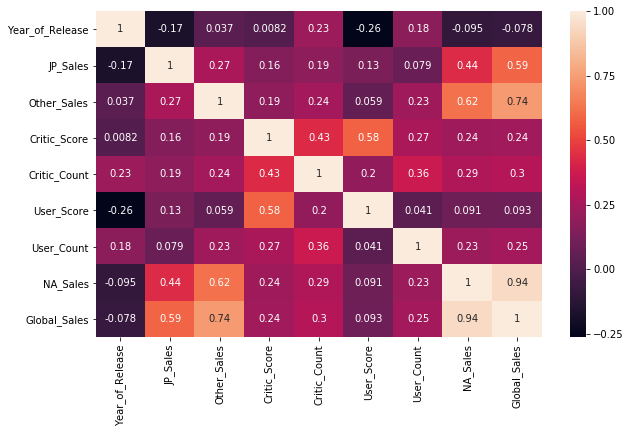

In [5]:
# Heatmap de la corrélation entre les variables
mapData = trainingData.drop(columns=['ID']) # Retire la colonne ID

plt.figure(figsize=(10, 6))

heatmap_corr = mapData.corr()
sns.heatmap(heatmap_corr, xticklabels = heatmap_corr.columns.values, yticklabels = heatmap_corr.columns.values, annot = True)

On remarque que les variables donnant le nombre de ventes sont très corrélées ensemble. En effet, la variable __Global_Sales__ à une corrélation de 0.94 avec la variable __NA_Sales__, une corrélation de 0.74 avec la variable __Other_Sales__ et une corrélation de 0.59 avec la variable __JP_Sales__. Le même phénomène est présent pour la variable __NA_Sales__ avec les autres variables de ventes.

Une autre découverte importante est la corrélation entre les variables __JP_Sales__ et __Other_Sales__ qui devra être considérée lors de la construction de nos modèles de prédiction.
On remarque aussi que les variables __NA_Sales__ et __Global_Sales__ ont presque la même corrélation avec les autres variables explicatives. Les seules exceptions sont avec les variables __JP_Sales__ et __Other_Sales__ où les corrélations sont plus importantes avec __Global_Sales__ qu'avec __NA_Sales__.

Par ailleurs, on remarque aussi que les scores des critiques et des utilisateurs (__User_Score__ et __Critic_Score__) sont assez corrélés avec le nombre de votes (__User_Count__ et __Critic_Count__).

#### 2.1.3. Analyse des variables
---

Voici les graphes des variables d'intérêts en fonction des variables explicatives contenant des valeurs numériques:

<Figure size 1008x1008 with 0 Axes>

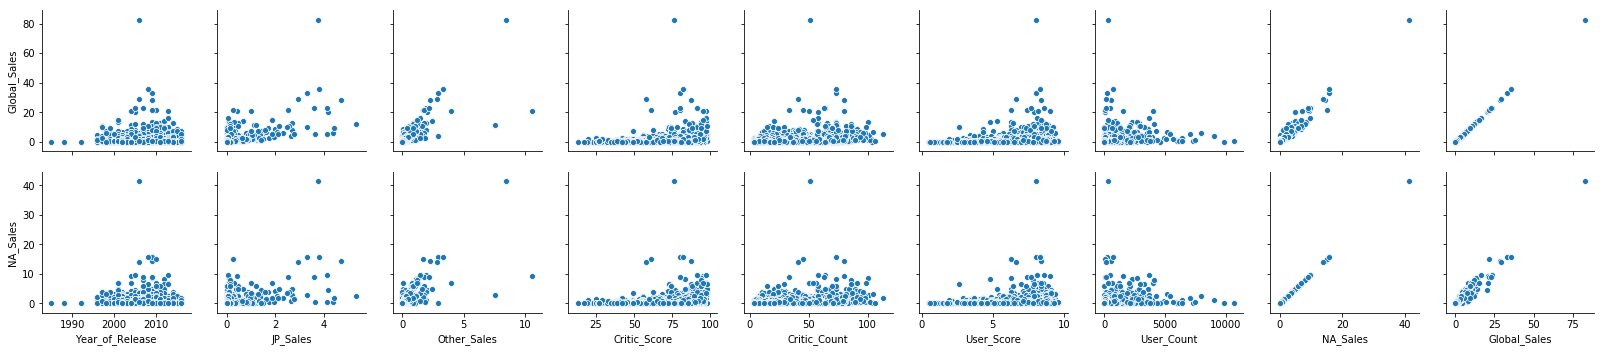

In [6]:
mapData = mapData.dropna()
plt.figure(figsize=(14, 14))
sns.pairplot(mapData, x_vars=['Year_of_Release','JP_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score','User_Count','NA_Sales','Global_Sales'], y_vars=["Global_Sales", "NA_Sales"], diag_kind='kde');

En regardant les graphiques des ventes, on confirme bien ce qui a été observé plus haut sur la corrélation avec les variables.

Analysons les variables explicatives qui ne sont pas des valeurs numériques.

-   Commençons par la variable __Rating__, regardons le nombre de ventes moyen par rating:

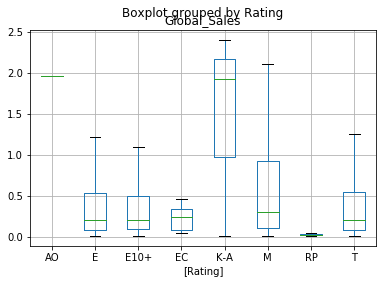

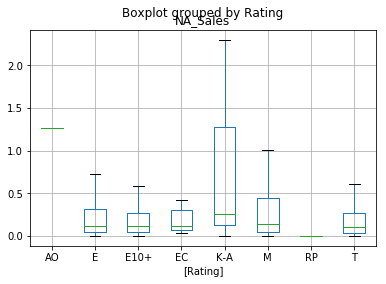

In [7]:
# Analyse du nombre de ventes par Rating
rating = trainingData[['Global_Sales','NA_Sales', 'Rating']] # On garde les colonnes nécessaires
rating = rating.dropna()

rating.boxplot(column=['Global_Sales'], by=['Rating'], showfliers=False)
rating.boxplot(column=['NA_Sales'], by=['Rating'], showfliers=False)

On remarque que certains ratings ont une petite variance comme _AO_, _EC_, _RP_. D'autres ratings ont une très grande variance comme _K-A_ et _M_.

Un autre fait intéressant est la grande différence des valeurs des quantiles pour le rating _K-A_ entre __Global_Sales__ et __NA_Sales__. Il faudra donc considérer la différence d'impact que le __Rating__ a sur les deux variables à prédire.


-   Pour la variable __Platform__:

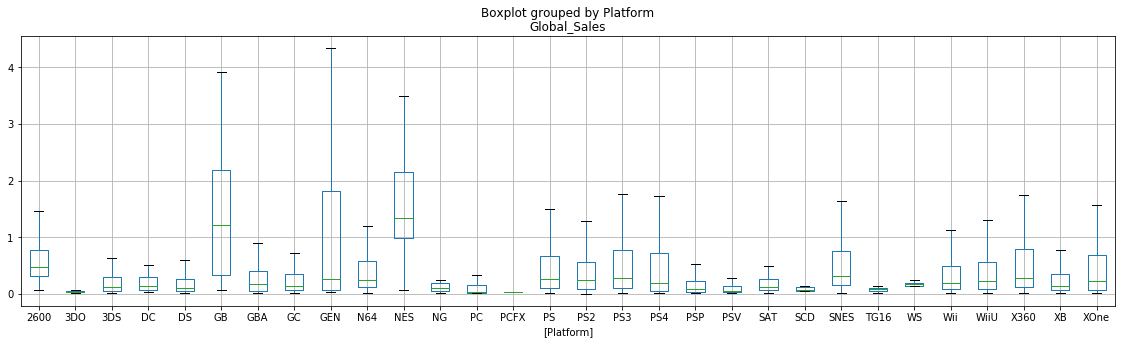

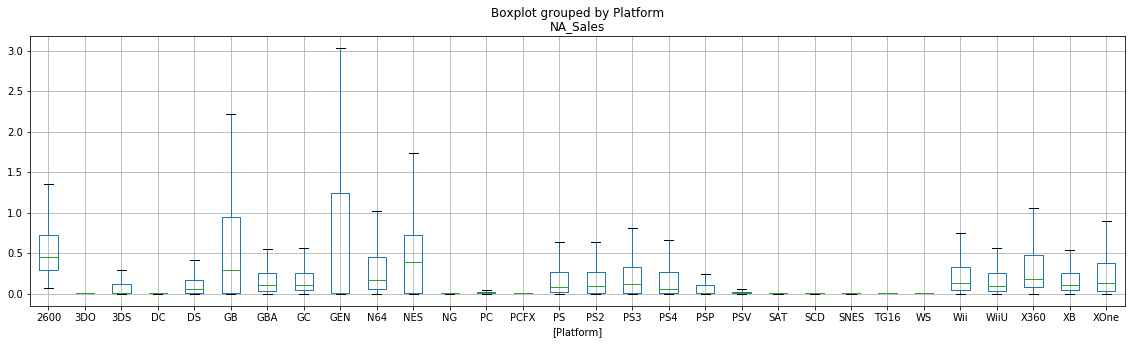

In [8]:
# Analyse du nombre de ventes par Plateforme
plateformes = trainingData[['Global_Sales','NA_Sales', 'Platform']] # On garde les colonnes nécessaires
plateformes = plateformes.dropna()

plateformes.boxplot(column=['Global_Sales'], by=['Platform'], showfliers=False, figsize = (19,5))
plateformes.boxplot(column=['NA_Sales'], by=['Platform'], showfliers=False, figsize = (19,5))

On remarque qu'il y a plusieurs plateformes différentes (30 au total). Encore une fois, il y a plusieurs plateformes qui ont une grande variance sur le nombre de ventes.

De plus, on remarque qu'il y a deux plateformes qui ont un impact différent sur les deux variables d'intérêts __NA_Sales__ et __Global_Sales__. En effet, la _NES_ et le _GB_ semblent avoir un impact plus important sur les ventes globales que sur les ventes en Amérique du Nord.

-   Pour la variable __Genre__:

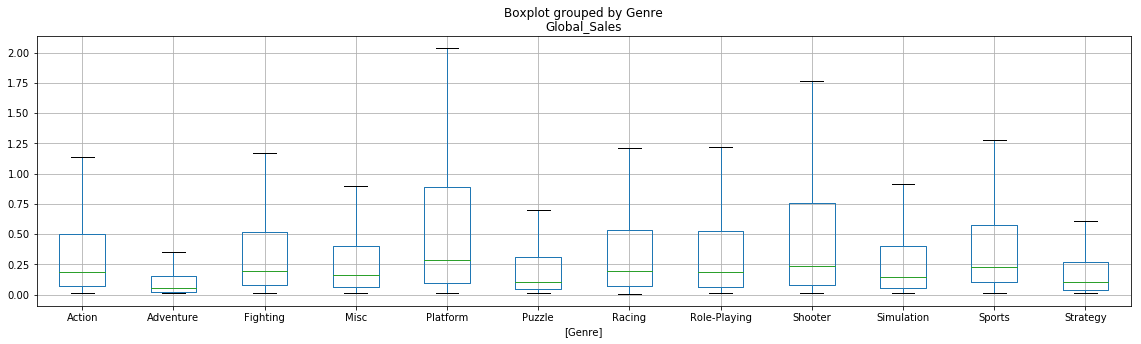

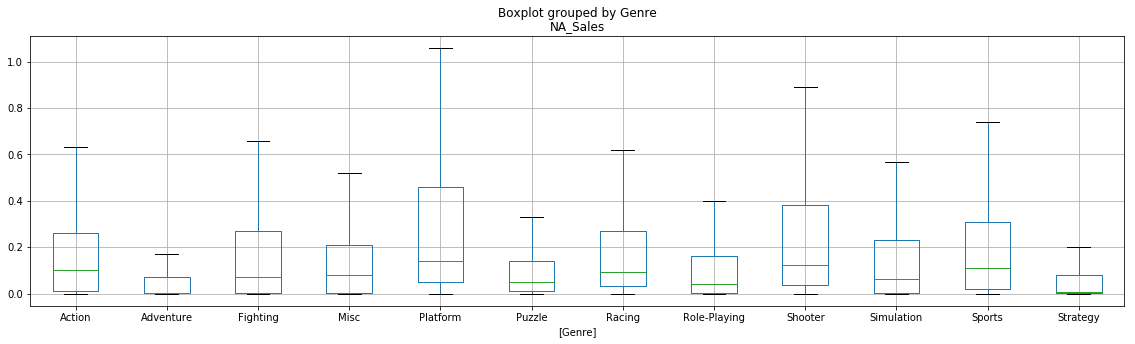

In [9]:
# Analyse du nombre de ventes par Genre
genres = trainingData[['Global_Sales','NA_Sales','Genre']] # On garde les colonnes nécessaires
genres = genres.dropna()

genres.boxplot(column=['Global_Sales'], by=['Genre'], showfliers=False, figsize = (19,5))
genres.boxplot(column=['NA_Sales'], by=['Genre'], showfliers=False, figsize = (19,5))

Comme pour la variable __Platform__, la plupart des genres ont une grande variance par rapport au ventes. Mis à part l'ordre de grandeur, les différents types de genre ont environ le même impact sur __NA_Sales__ et __Global_Sales__.

-   Pour la variable __Publisher__:

In [10]:
rep = allData['Publisher'].value_counts(dropna=False)
unique = len(np.where(rep==1)[0])
print(rep)
print('Nombre de publishers unique: ' + str(unique))
print('% des publishers uniques: ' + str(unique / len(rep)))

Electronic Arts                           1356
Activision                                 971
Namco Bandai Games                         938
Ubisoft                                    930
Konami Digital Entertainment               831
Nintendo                                   703
THQ                                        696
Sony Computer Entertainment                684
Sega                                       634
Take-Two Interactive                       415
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Square Enix                                234
Warner Bros. Interactive Entertainment     233
Disney Interactive Studios                 213
Unknown                                    200
Eidos Interactive                          197
Midway Games                               194
Microsoft Game Studios                     191
505 Games                                  189
Acclaim Enter

Premièrement, on remarque qu'il y a plusieurs __Publisher__ différents (il y a une grande cardinalité soit 580 __Publisher__). De plus, il y a 186 __Publisher__ qui apparaissent seulement une fois dans toutes nos données (train + test). Celles-ci représentent environ 32% de tous les __Publisher__.

-   Enfin pour la varible __Developer__:

In [11]:
rep = allData['Developer'].value_counts(dropna=False)
unique = len(np.where(rep==1)[0])
print(rep)
print('Nombre de developers unique: ' + str(unique))
print('% des developers uniques: ' + str(unique / len(rep)))

NaN                                                                                 6525
Ubisoft                                                                              204
EA Sports                                                                            172
EA Canada                                                                            167
Konami                                                                               162
Capcom                                                                               139
EA Tiburon                                                                           108
Electronic Arts                                                                      104
Ubisoft Montreal                                                                     101
Visual Concepts                                                                       99
Omega Force                                                                           80
Vicarious Visions    

Encore une fois, on remarque qu'il y a plusieurs __Developer__ différents (il y a une grande cardinalité soit 1696 __Developer__). De plus, il y a 649 __Developer__ qui apparaissent seulement une fois dans toutes nos données (train + test). Celles-ci représentent environ 38% de tous les __Developer__.

#### 2.1.4. Analyse des maximas
---

Regardons maintenant nos données en considérant seulement les jeux qui sont dans le top 10% des __NA_Sales__ et __Global_Sales__:

In [12]:
#Analyse du top 10% des jeux les plus populaire (nb ventes globale et NA)
dixPourcent = int(np.ceil(trainingData.shape[0] * 0.05))

topGlobal = trainingData.nlargest(dixPourcent, "Global_Sales", keep='first')
topNA = trainingData.nlargest(dixPourcent, "NA_Sales", keep='first')
lowGlobal = trainingData.nsmallest(dixPourcent, "Global_Sales", keep='first')
lowNA = trainingData.nsmallest(dixPourcent, "NA_Sales", keep='first')

print('10% des jeux les plus vendus en Amérique du Nord')
topNA.describe()

10% des jeux les plus vendus en Amérique du Nord


,ID,Year_of_Release,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Global_Sales
count,705.000000,695.000000,705.000000,705.000000,471.000000,471.000000,479.000000,479.000000,705.000000,705.000000
mean,7523.775887,2004.293525,0.400981,0.379597,82.356688,45.838641,7.630898,622.513570,2.445460,4.390637
std,4045.604307,7.238836,0.920103,0.694254,10.882553,25.657056,1.253750,1084.489763,2.830800,5.242125
min,11.000000,1980.000000,0.000013,0.000116,20.000000,4.000000,1.900000,4.000000,1.079409,1.182293
25%,4067.000000,2000.000000,0.001295,0.100761,78.000000,24.000000,7.100000,54.000000,1.321901,2.094974
50%,7789.000000,2005.000000,0.038298,0.220567,84.000000,41.000000,7.900000,142.000000,1.729871,2.940730
75%,11020.000000,2009.500000,0.249313,0.420921,90.000000,68.000000,8.500000,700.500000,2.471406,4.630463
max,14064.000000,2016.000000,7.201332,10.570989,98.000000,113.000000,9.400000,9073.000000,41.359778,82.540699


In [13]:
print('10% des jeux les moins vendus en Amérique du Nord')
lowNA.describe()

10% des jeux les moins vendus en Amérique du Nord


,ID,Year_of_Release,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Global_Sales
count,705.000000,700.000000,705.000000,705.000000,90.000000,90.000000,98.000000,98.000000,7.050000e+02,705.000000
mean,6702.917730,2007.542857,0.123899,0.005926,74.477778,23.877778,7.305102,224.102041,1.788858e-04,0.149045
std,4083.603287,6.411242,0.303232,0.027900,11.425605,15.238794,1.313716,536.977711,1.070920e-04,0.311959
min,21.000000,1984.000000,0.000011,0.000006,36.000000,4.000000,2.200000,4.000000,5.902098e-07,0.009346
25%,3050.000000,2006.000000,0.009382,0.000545,68.250000,13.000000,6.650000,20.000000,8.513298e-05,0.023398
50%,6706.000000,2009.000000,0.038875,0.001099,75.500000,22.000000,7.650000,47.500000,1.759171e-04,0.055060
75%,9943.000000,2012.000000,0.120712,0.001815,82.750000,32.500000,8.300000,267.250000,2.705522e-04,0.143178
max,14094.000000,2017.000000,4.869845,0.481526,94.000000,77.000000,9.100000,4572.000000,3.702689e-04,4.873001


Pour les maximas de la variable __NA_Sales__, on remarque un fait intéressant. Le nombre de ventes NA est supérieur aux ventes du Japon pour les 10% des plus vendus. Tandis que pour les 10% moins vendus, le nombre de vente au Japon est supérieur que celui de NA. Ceci indique donc qu'il y a des jeux qui se vendent beaucoup en Amérique du Nord même s'ils ne se vendent pas beaucoup au Japon. Dans le même ordre d'idées, il ya des jeux qui se vendent beaucoup au Japon, mais très peu en Amérique du Nord. 

In [14]:
print('10% des jeux les plus vendus Global')
topGlobal.describe()

10% des jeux les plus vendus Global


,ID,Year_of_Release,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Global_Sales
count,705.000000,696.000000,705.000000,705.000000,482.000000,482.000000,491.000000,491.000000,705.000000,705.000000
mean,7341.808511,2005.008621,0.585866,0.439903,82.815353,47.921162,7.641955,676.810591,2.292572,4.685478
std,4071.443056,7.295800,1.033971,0.708223,9.590424,25.323643,1.194149,1125.572679,2.908073,5.141134
min,11.000000,1980.000000,0.000013,0.000066,25.000000,4.000000,2.600000,4.000000,0.000053,2.059805
25%,3845.000000,2001.000000,0.009151,0.158234,78.000000,26.000000,7.050000,68.500000,1.148586,2.490587
50%,7623.000000,2007.000000,0.081707,0.280422,84.000000,45.000000,7.900000,203.000000,1.681107,3.231121
75%,10965.000000,2010.000000,0.731053,0.491757,90.000000,69.000000,8.500000,767.500000,2.471406,4.840770
max,14064.000000,2016.000000,7.201332,10.570989,98.000000,113.000000,9.400000,9073.000000,41.359778,82.540699


In [15]:
print('10% des jeux les moins vendus Global')
lowGlobal.describe()

10% des jeux les moins vendus Global


,ID,Year_of_Release,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Global_Sales
count,705.000000,689.000000,705.000000,705.000000,206.000000,206.000000,171.000000,171.000000,705.000000,705.000000
mean,6954.923404,2008.879536,0.004975,0.000998,64.543689,15.873786,6.928655,85.918129,0.003850,0.014592
std,4155.987726,4.505004,0.005080,0.000583,14.557055,11.199460,1.718668,207.897894,0.004358,0.003248
min,17.000000,1993.000000,0.000002,0.000002,23.000000,4.000000,1.400000,4.000000,0.000003,0.008667
25%,3271.000000,2006.000000,0.000783,0.000485,55.250000,8.000000,6.100000,8.000000,0.000690,0.012119
50%,6976.000000,2009.000000,0.001690,0.000987,65.000000,13.000000,7.500000,20.000000,0.001424,0.013603
75%,10355.000000,2012.000000,0.009531,0.001529,75.750000,20.750000,8.100000,91.500000,0.008776,0.016515
max,14087.000000,2016.000000,0.019314,0.001998,93.000000,59.000000,9.500000,2089.000000,0.018851,0.020857


On remarque pour les jeux les plus vendus Globalament que toutes les variables de ventes semblent augmenter proportionnellement par rapport au nombre de ventes Globales (et inversement diminuer aussi!). Ainsi, on remarque la variation des variables __JP_Sales__ n'impacte pas nécessairement de la même façon les variables __NA_Sales__ et __Global_Sales__.

## 3. Valeurs manquantes
---

Dans l'analyse des variables nous avons remarqué qu'il y a plusieurs variables dont certaines valeurs sont manquantes. Analysons chacune de ces variables de façons séparées.

Pour remplir les données, nous avons testé plusieurs méthodes, soit utiliser la moyenne, la médiane, le mode ou retirer simplement les jeux qui ont des données manquantes. Pour se faire, nous avons utilisé la validation croisée sur chacun de nos modèles et ainsi déterminer laquelle de nos méthodes offrent la plus petite erreur avec les données à predire (données de validation). Dans tous les cas, retirer les données manquantes avait un impact négatif sur tous les modèles, car trop de données étaient retirées.

### 3.1. User_Count
---

In [16]:
#Analyse de User_Count
User_Count = pd.DataFrame()
User_Count['User_Count'] = allData['User_Count']

User_Count_mode = User_Count.mode().values[0,0]
User_Count_mean = User_Count.mean().values[0]
User_Count_median = User_Count.median().values[0]

print('Mode: ' + str(User_Count_mode) + '\n' + 'Moyenne: ' + str(User_Count_mean) + '\n' + 'Médiane: ' + str(User_Count_median))
valeursManquantes(User_Count)

Mode: 4.0
Moyenne: 162.38804390953578
Médiane: 24.0


,Valeurs Manquantes,% des valeurs totales
User_Count,9023,54.4


Pour la variable __User_Count__, 54,4% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Par validation croisée, nous avons déterminé qu'utiliser le mode pour remplacer les données manquantes était la meilleure méthode.

In [17]:
allData = allData.fillna({'User_Count':User_Count_mode})

### 3.2. User_Score
---

In [18]:
#Analyse de User_Score
User_Score = pd.DataFrame()
User_Score['User_Score'] = allData['User_Score']

User_Score_mode = User_Score.mode().values[0, 0]
User_Score_mean = User_Score.mean().values[0]
User_Score_median = User_Score.median().values[0]

print('Mode: ' + str(User_Score_mode) + '\n' + 'Moyenne: ' + str(User_Score_mean) + '\n' + 'Médiane: ' + str(User_Score_median))
valeursManquantes(User_Score)

Mode: 7.8
Moyenne: 7.123422827668298
Médiane: 7.5


,Valeurs Manquantes,% des valeurs totales
User_Score,9023,54.4


Pour la variable __User_Score__, 54,4% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Par validation croisée, nous avons déterminé qu'utiliser le mode pour remplacer les données manquantes était la meilleure méthode.

In [19]:
allData = allData.fillna({'User_Score':User_Score_mode})

### 3.3. Critic_Score
---

In [20]:
#Analyse de Critic_Score
Critic_Score = pd.DataFrame()
Critic_Score['Critic_Score'] = allData['Critic_Score']

Critic_Score_mode = Critic_Score.mode().values[0,0]
Critic_Score_mean = Critic_Score.mean().values[0]
Critic_Score_median = Critic_Score.median().values[0]

print('Mode: ' + str(Critic_Score_mode) + '\n' + 'Moyenne: ' + str(Critic_Score_mean) + '\n' + 'Médiane: ' + str(Critic_Score_median))
valeursManquantes(Critic_Score)

Mode: 70.0
Moyenne: 68.97248951394029
Médiane: 71.0


,Valeurs Manquantes,% des valeurs totales
Critic_Score,8478,51.1


Pour la variable __Critic_Score__, 51,1% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Par validation croisée, nous avons déterminé qu'utiliser le mode pour remplacer les données manquantes était la meilleure méthode.

In [21]:
allData = allData.fillna({'Critic_Score':Critic_Score_mode})

### 3.4. Critic_Count
---

In [22]:
#Analyse de Critic_Count
Critic_Count = pd.DataFrame()
Critic_Count['Critic_Count'] = allData['Critic_Count']

Critic_Count_mode = Critic_Count.mode().values[0,0]
Critic_Count_mean = Critic_Count.mean().values[0]
Critic_Count_median = Critic_Count.median().values[0]

print('Mode: ' + str(Critic_Count_mode) + '\n' + 'Moyenne: ' + str(Critic_Count_mean) + '\n' + 'Médiane: ' + str(Critic_Count_median))
valeursManquantes(Critic_Count)

Mode: 4.0
Moyenne: 26.370096225018504
Médiane: 21.0


,Valeurs Manquantes,% des valeurs totales
Critic_Count,8478,51.1


Pour la variable __Critic_Count__, 51,1% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Par validation croisée, nous avons déterminé qu'utiliser la médiane pour remplacer les données manquantes était la meilleure méthode.

In [23]:
allData = allData.fillna({'Critic_Count':Critic_Count_median})

### 3.5. Year_of_Release
---

In [24]:
#Analyse de Year_of_Release
Year_of_Release = pd.DataFrame()
Year_of_Release['Year_of_Release'] = allData['Year_of_Release']

Year_of_Release_mode = Year_of_Release.mode().values[0,0]
Year_of_Release_mean = Year_of_Release.mean().values[0]
Year_of_Release_median = Year_of_Release.median().values[0]

print('Mode: ' + str(Year_of_Release_mode) + '\n' + 'Moyenne: ' + str(Year_of_Release_mean) + '\n' + 'Médiane: ' + str(Year_of_Release_median))
valeursManquantes(Critic_Count)

Mode: 2008.0
Moyenne: 2006.4738003309433
Médiane: 2007.0


,Valeurs Manquantes,% des valeurs totales
Critic_Count,8478,51.1


Pour la variable __Year_of_Release__, 51,1% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Par validation croisée, nous avons déterminé qu'utiliser la moyenne pour remplacer les données manquantes était la meilleure méthode.

In [25]:
allData = allData.fillna({'Year_of_Release':Year_of_Release_mean})

### 3.6. Rating
---

In [26]:
#Analyse de Rating
Rating = pd.DataFrame()
Rating['Rating'] = allData['Rating']

Rating_mode = Rating.mode().values[0, 0]

print('Mode: ' + str(Rating_mode))
valeursManquantes(Rating)

Mode: E


,Valeurs Manquantes,% des valeurs totales
Rating,6671,40.2


Pour la variable __Rating__, 40,2% des données sont manquantes, ainsi retirer celles-ci aurait un très grand impact sur le nombre de données d'entraînement.

Ici seul le mode est une valeur qui fait du sens puisque la variable représente des catégories.

In [27]:
allData = allData.fillna({'Rating':Rating_mode})

### 3.7. Publisher
---

In [28]:
#Analyse de Publisher
Publisher = pd.DataFrame()
Publisher['Publisher'] = allData['Publisher']

Publisher_mode = Publisher.mode().values[0, 0]

print('Mode: ' + str(Publisher_mode))
valeursManquantes(Publisher)

Mode: Electronic Arts


,Valeurs Manquantes,% des valeurs totales
Publisher,53,0.3


Pour la variable __Publisher__, 0,3% des données sont manquantes, même si c'est un faible pourcentage de nos données, retirer celles-ci avait un impact négatif sur nos modèles.

Ici seul le mode est une valeur qui fait du sens puisque la variable représente des catégories.

In [29]:
allData = allData.fillna({'Publisher':Publisher_mode})

## 4. Présentation des modèles
---

Voici les modèles que nous avons utilisés pour prédire les variables __NA_Sales__ et __Global_Sales__.

### 4.1. Validation croisée
---

Il s’agit d’une technique de validation de modèle qui permet de tester la prédiction de nouvelles données d’un modèle. Effectivement, nous avons un ensemble de données connu qui sert de training dataset et un ensemble de données inconnues unknown data qui servira à tester l’habilité du modèle à prédire. Le principe de cross-validation implique qu’il y aille un partitionnement des données en plusieurs sous-ensembles. Ce partitionnement nous permettra de tester le modèle avec des données qui n’ont pas été utilisées pour entrainer notre modèle. Cela nous permettra de voir la performance de prédiction de notre modèle si un ensemble de données indépendant et inconnu lui est présenté.

Précisément, l’analyse est effectuée dans un des sous-ensembles (training set) et est validée par un autre sous-ensemble (validation set). Cette étape peut être effectuée à plusieurs reprises utilisant différents sous-ensembles afin de réduire la variance. Tous les sous-ensembles de validations sont assemblés pour toutes les fois que cette étape est effectuée afin d’avoir un aperçu de la performance du modèle en ce qui concerne la prédiction. La méthode de cross-validation testera diverses combinaisons de partition pour voir laquelle est la plus efficace. Cela nous permettra de savoir quelle portion des données devrait être utilisé pour train le modèle et laquelle pour tester et valider ce dernier.

Il existe deux types principaux de cross-validation, soit exhaustive cross-validation et non-exhaustive cross-validation. L’exhaustive cross-validation s’assure de tester toutes les combinaisons possibles de partitionnement de l’échantillon. Cependant, le non-exhaustive cross-validation ne teste pas toutes les combinaisons possibles. Dans notre cas, nous avons décidé d’utiliser un type de non-exhaustive cross-validation nommé k-fold cross-validation. Cette méthode partitionne notre échantillon en k sous-ensembles qui seront utilisés pour tester et valider notre modèle et k-1 sous-ensembles pour entrainer ce dernier.  Chacun des k sous-ensembles de validation est tester une seule fois en tant que l’ensemble de validation. Ensuite, ces résultats seront combinés pour aboutir à une seule estimation. 

Nous utilisons la cross-validation pour optimiser les hyperparamètres de nos modèles. En effet, nous utiliserons un split 80/20 sur nos données d'entrainement. Par ailleurs, nous utilisons aussi la cross-validation pour savoir la valeur que nous devions utilisée pour remplacer les données manquantes.

Informations tirées de :
<br>
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

### 4.2. Estimation de la performance de nos modèles
---

Puisque l'évaluation de nos modèles sur Kaggle se fait avec RMSE, nous utiliserons le RMSE entre la prédiction de nos modèles et nos données de validation (par validation croisée):

In [30]:
def RMSE(predictionNA, predictionGlob, validation):
    rmsA = np.sqrt(mean_squared_error(predictionNA, validation['NA_Sales'].values))
    rmsB = np.sqrt(mean_squared_error(predictionGlob, validation['Global_Sales'].values))

    return (rmsA + rmsB) / 2

def RMSE_NA(prediction, validation):
    rmsA = np.sqrt(mean_squared_error(prediction, validation['NA_Sales'].values))

    return rmsA

def RMSE_Global(prediction, validation):
    rmsB = np.sqrt(mean_squared_error(prediction, validation['Global_Sales'].values))

    return rmsB

### 4.3. Modèles linéaires
---

Pour commencer, nous avons décidé d'essayer deux modèles de régression linéaire:
- Régression linéaire par composantes principales
- Régression linéraire bayesienne

#### 4.3.1. Régression linéaire par composantes principales
---

Le premier modèle que nous avons essayer est celui des composantes principales. Nous avons décidé de commencer par celui-ci, car nous avons remarqué dans l'analyse des variables que plusieurs variables explicatives étaient corrélées ensemble. Comme nous l'avons appris en cours, en utilisant les composantes principales, il est possible de se débarasser de toutes les multicolinéarités:

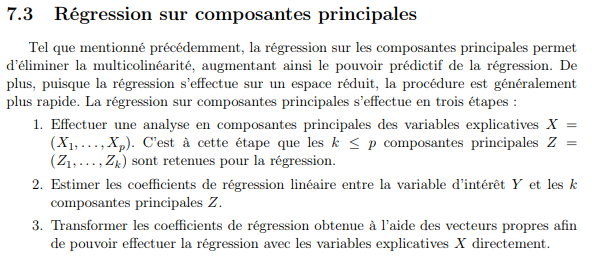

Image tirée du chapitre 7 des notes de cours.


Notre stratégie était d'utiliser le plus de variables explicatives possibles pour essayer d'avoir le meilleur pouvoir prédictif.

De plus, nous avons décidé de faire deux modèles différents, un pour __NA_Sales__ et un pour __Global_Sales__, car nous avons remarqué, dans la section sur l'analyse des variables, que les variables explicatives avaient des impacts différents sur les variables d'intérêt.

##### 4.3.1.1. Sélection des variables explicatives
---

Voici les variables explicatives que nous avons utilisées:

- JP_Sales
- Other_Sales
- User_Count
- Genre
- Platform
- Critic_Score
- Critic_Count
- Year_of_Release
- User_Score
- Publisher
- Developer

De plus nous avons rajouté une variable explicative:

- Number_of_Game_per_Year

Le nombre de jeux sortis par année devrait avoir un impact sur le nombre de ventes pour les jeux sortis à cette année. Par exemple, si plusieurs jeux sont sortis à une certaine année, le nombre de vente pour un jeu de cette même année devrait être dilué par rapport à une année ou il y a seulement un jeu qui est sorti. Effectivement, l'impact sera plus grand s'il y a moins de jeux sortis cette année.

In [31]:
#Nombre de jeux vendus par année
nombreJeuxAnnée = allData.groupby(['Year_of_Release']).size()

allData['Number_of_Game_per_Year'] = np.zeros(allData.shape[0])
for i in range(allData.shape[0]):
    for j in range(1980,  1980 + nombreJeuxAnnée.shape[0] + 1):
        if j == int(allData.loc[i, ('Year_of_Release')]):
            allData.loc[i, ('Number_of_Game_per_Year')] = nombreJeuxAnnée[j]
            break

Pour utiliser les variables explicatives qui n'ont pas de valeurs numériques, nous avons utilisé un encodage binaire (aussi appelé One hot encoding). 

One hot encoding est une méthode où des catégories sont converties en une forme de code binaire pour être représentées. Assurément, cette méthode facilite l’utilisation de ces catégories dans les algorithmes de machine learning. Chacune des catégories différentes aura une combinaison de bits binaires (0 ou 1). Les valeurs peuvent aller de 0 à N-1, où N est le nombre de catégories différentes. Nous utiliserons un exemple concret pour mieux expliquer cette méthode. Supposons que nous avons une variable explicative « Type d’animal » avec cinq valeurs différentes, soit vache, cochon, poule, chèvre et cheval. Nous avons les données suivantes représentées dans le tableau 1 ci-dessous.

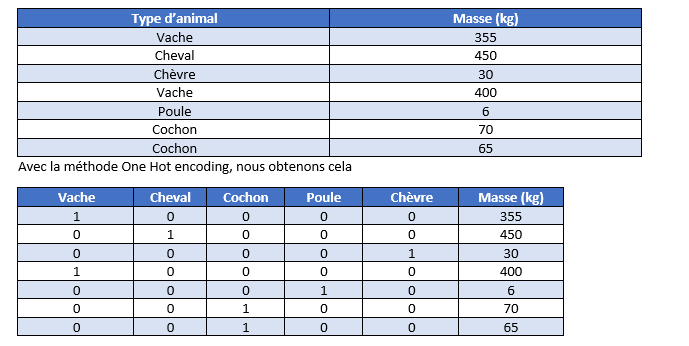

Comme nous pouvons le voir dans ce tableau, nous avons chacune des données représentées par des valeurs booléennes. Nous pouvons imaginer que nous avons maintenant des variables booléennes soit: estVache, estCochon, estCheval, estPoule et estChèvre à la place de vache, cochon, cheval, poule et chèvre.

Informations tirées de:
<br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [32]:
#Selection des variables explicatives
Xall = allData[['JP_Sales', 'Other_Sales', 'User_Count', 'Genre', 'Platform', 'Critic_Score', 'Critic_Count', 'Year_of_Release', 'User_Score', 'Publisher', 'Developer', 'Number_of_Game_per_Year']]

#One-hot encoding pour les variables non numériques
temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp


#Split train/test
X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

X.head()

,JP_Sales,Other_Sales,User_Count,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Developer_id Software- Nerve Software,Developer_id Software- Raven Software,Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_oeFun,Developer_puzzle.tv,Developer_syn Sophia,Developer_zSlide,Number_of_Game_per_Year
0,0.050524,0.010024,13.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,761.0
1,0.039211,0.001791,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1242.0
2,0.000374,0.001797,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003.0
3,0.001382,0.140010,41.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,824.0
4,0.069422,0.009535,61.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,576.0


##### 4.3.1.2. Modèles en action
---

In [33]:
#Split 80/20 pour cross-validation
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, trainingData[['NA_Sales', 'Global_Sales']], test_size=0.2, random_state=47)

In [34]:
#Composantes principales

#Matrice de covariance, vecteurs propres et valeurs propres
matriceCov = Xtrain.cov()
lamda, e = np.linalg.eig(matriceCov.values)

#On garde seulement la partie réelle
lamda = np.real(lamda)
e = np.real(e)

#On ordonne les valeurs propres en ordre décroissant (même ordre pour les vecteurs propres)
idx = lamda.argsort()[::-1]
lamda = lamda[idx]
e = e[:,idx]

Pour déterminer le nombre de composantes principales que nous allons utilisé dans le modèle pour __NA_Sales__ et __Global_Sales__, nous avons calculé l'impact que le nombre de composantes principales utilisé avait sur le RMSE (à l'aide de la validation croisée).

Voici le code que nous avons utilisé pour trouver le nombre de composantes principales qui minimisent le RMSE:
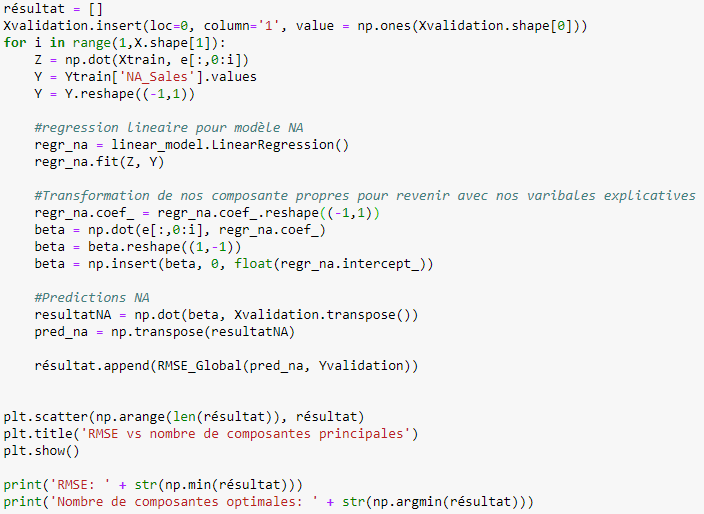

Nous n'avons pas inclus ce code dans le notebook, car il prend beaucoup de temps à exécuter. Voici par contre les graphiques et le nombre de composantes principales optimal pour les deux modèles:

Pour __NA_Sales__:
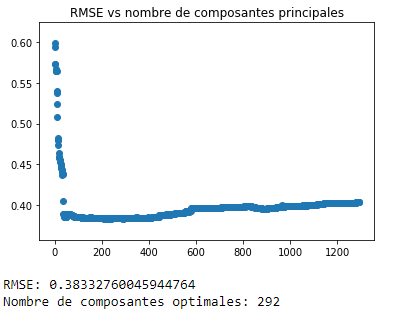

Pour __Global_Sales__:
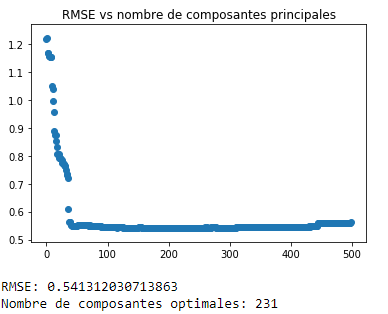


Ainsi, nous allons utiliser 292 composantes principales pour le modèle de __NA_Sales__ et 231 composantes pour le modèle de __Global_Sales__.

In [35]:
#Ajouter une colonne de 1 pour Beta0
Xvalidation.insert(loc=0, column='1', value = np.ones(Xvalidation.shape[0]))

#Modèle pour NA_Sales
Z = np.dot(Xtrain, e[:,0:292])
Y = Ytrain['NA_Sales'].values
Y = Y.reshape((-1,1))

#Régression linéaire pour modèle NA
regr_na = linear_model.LinearRegression()
regr_na.fit(Z, Y)

#Transformation de nos composantes propres pour revenir avec nos varibales explicatives
regr_na.coef_ = regr_na.coef_.reshape((-1,1))
beta = np.dot(e[:,0:292], regr_na.coef_)
beta = beta.reshape((1,-1))
beta = np.insert(beta, 0, float(regr_na.intercept_))

#Prédictions NA
resultatNA = np.dot(beta, Xvalidation.transpose())
predCP_na = np.transpose(resultatNA)

#Modèle pour Global_Sales
Z2 = np.dot(Xtrain, e[:,0:231])
Yglob = Ytrain['Global_Sales'].values
Yglob = Yglob.reshape((-1,1))

regr_glob = linear_model.LinearRegression()
regr_glob.fit(Z2, Yglob)

#Transformation de nos composantes propres pour revenir avec nos varibales explicatives
regr_glob.coef_ = regr_glob.coef_.reshape((-1,1))
beta2 = np.dot(e[:,0:231], regr_glob.coef_)
beta2 = beta2.reshape((1,-1))
beta2 = np.insert(beta2, 0, float(regr_glob.intercept_))

#Prédictions Global
resultatGLOB = np.dot(beta2, Xvalidation.transpose())
predCP_glob = np.transpose(resultatGLOB)

#RMSE combiné
RMSE_Composante = RMSE(predCP_na, predCP_glob, Yvalidation)
print('RMSE combiné du modèle de composantes principales: ' + str(RMSE_Composante))

RMSE combiné du modèle de composantes principales: 0.4623816492758102


#### 4.3.2. Régression linéaire bayesienne
---

Le deuxième modèle que nous avons essayé est celui de la régression bayesienne (avec fonction priori G de zellner).

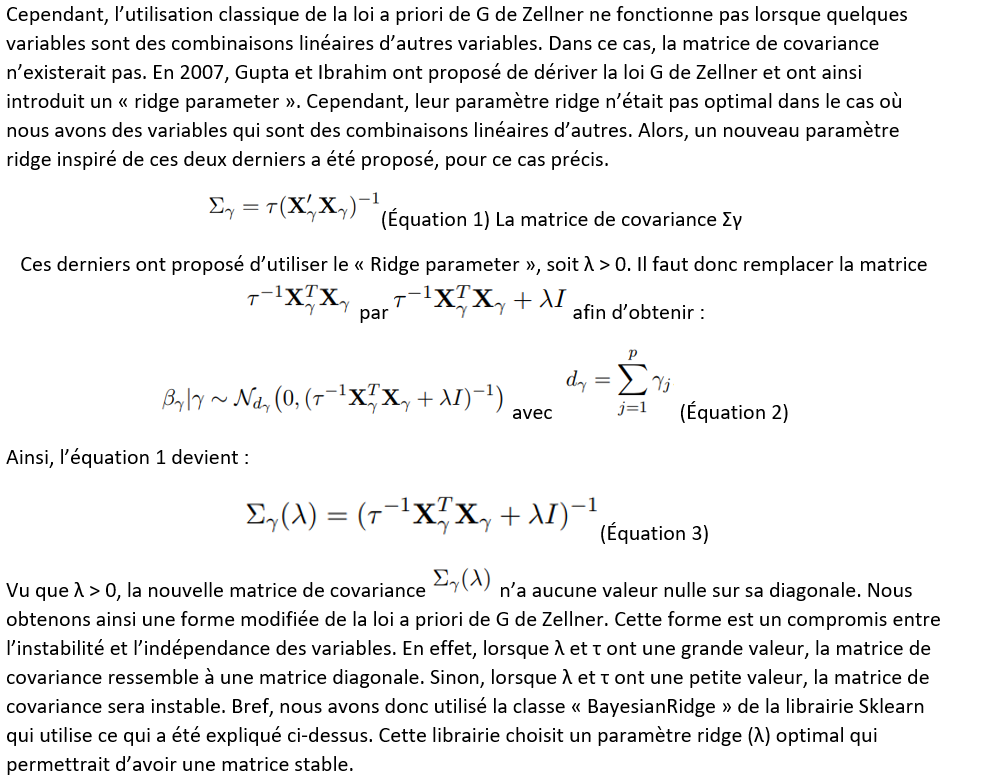

Informations et équations tirées de https://hal.archives-ouvertes.fr/file/index/docid/573810/filename/selection_variable_ridge-HAL2.pdf



##### 4.3.2.1. Sélection des variables explicatives
---

Voici les variables explicatives que nous avons utilisées:

- JP_Sales
- Other_Sales
- Genre
- Platform
- Year_of_Release
- Publisher
- Developer

De plus, nous avons ajouté deux variables explicatives:

- Number_of_Game_per_Year
- Weighted_score

Nous avons opté pour une varaible explicative __Weighted_Score__ qui est:

\begin{align}
WeightedScore & = \frac{(UserScore * 10 * UserCount) + (CriticScore * CriticCount)}{UserCount + CriticCount}\\
\end{align}

Nous avons remarqué une forte corrélation entre les Scores et les Count des critics et des users. De ce fait, nous éliminons cette multicolinéarité en utilisant un seul score combiné:

In [36]:
#Calcul du Weighted_Score
allData["Weighted_Score"] = (allData["User_Score"] * 10 * allData["User_Count"] + 
                            allData["Critic_Score"] * allData["Critic_Count"]) / (allData["User_Count"] + allData["Critic_Count"])
allData["Weighted_Score"].fillna(0.0, inplace=True)

Comme pour les modèles des composantes principales, nous avons utilisé un encodage binaire (aussi appelé one-hot encoding) pour les variables explicatives qui n'ont pas de valeurs numériques. Ainsi, chaque catégorie devient une variable explicative binaire:

In [37]:
#Selection des variables explicatives
Xall = allData[['JP_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year_of_Release', 'Weighted_Score', 'Publisher','Developer', 'Number_of_Game_per_Year']]

#One-hot encoding pour les variables non numériques
temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp

#Split train/test
X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

X.head()

,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,...,Developer_id Software- Nerve Software,Developer_id Software- Raven Software,Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_oeFun,Developer_puzzle.tv,Developer_syn Sophia,Developer_zSlide,Number_of_Game_per_Year
0,0.050524,0.010024,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,761.0
1,0.039211,0.001791,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1242.0
2,0.000374,0.001797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003.0
3,0.001382,0.140010,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,824.0
4,0.069422,0.009535,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,576.0


##### 4.3.2.2. Modèles en action
---

In [38]:
#Split 80/20 pour cross-validation
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, trainingData[['NA_Sales', 'Global_Sales']], test_size=0.2, random_state=47)

Pour déterminer le nombre d'itérations que nous allons utilisé dans le modèle pour __NA_Sales__ et __Global_Sales__, nous avons calculé l'impact que le nombre d'itérations a sur le RMSE (à l'aide de la validation croisée).

Voici le code que nous avons utilisé pour trouver le nombre de composantes principales qui minimisent le RMSE:

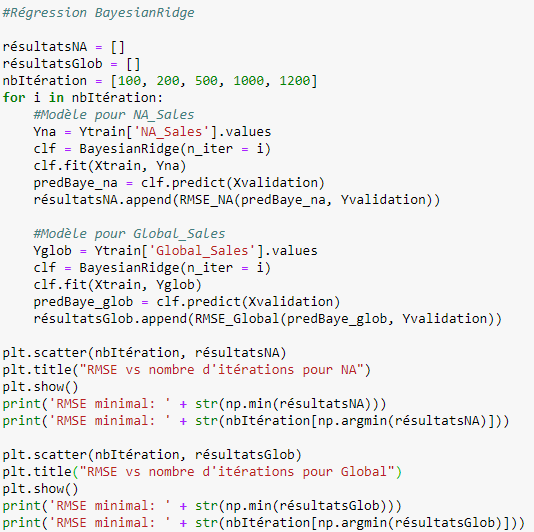

Nous n'avons pas inclus ce code dans le notebook, car il prend beaucoup de temps à exécuter. Par contre, voici les graphiques et le nombre d'itérations optimal pour les deux modèles:

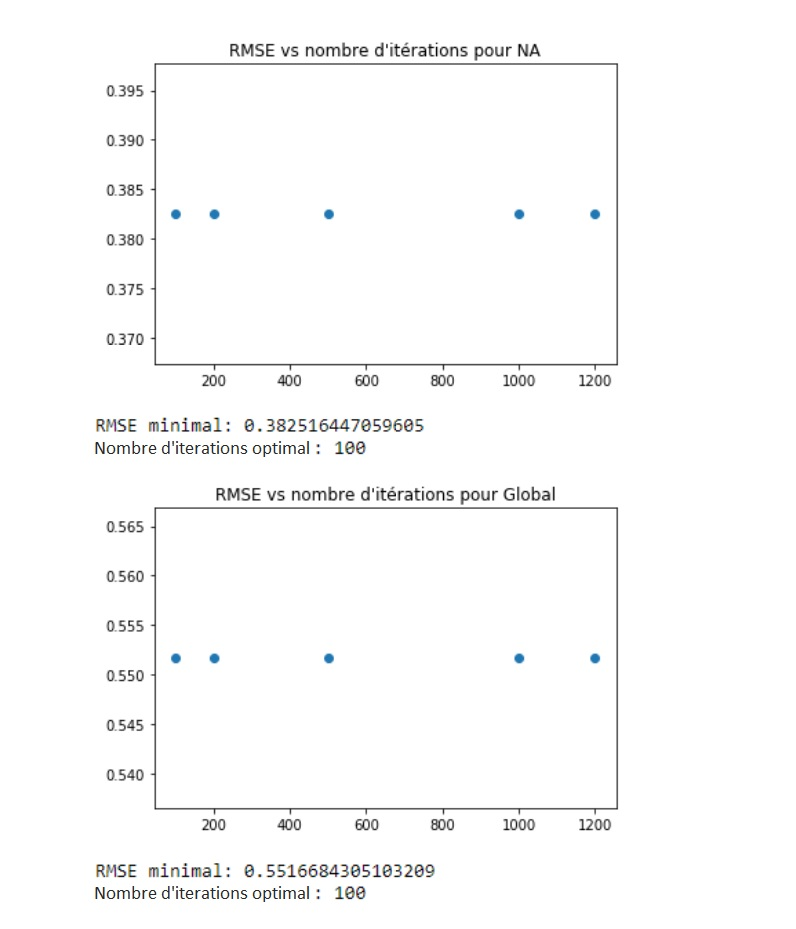

Ainsi pour les deux modèles nous allons utiliser 100 itérations.

In [39]:
#Régression BayesianRidge

#Modèle pour NA_Sales
Yna = Ytrain['NA_Sales'].values
clf = BayesianRidge(n_iter = 100)
clf.fit(Xtrain, Yna)
predBaye_na = clf.predict(Xvalidation)

#Modèle pour Global_Sales
Yglob = Ytrain['Global_Sales'].values
clf = BayesianRidge(n_iter = 100)
clf.fit(Xtrain, Yglob)
predBaye_glob = clf.predict(Xvalidation)

#RMSE combiné
RMSE_Baye = RMSE(predBaye_na, predBaye_glob, Yvalidation)
print('RMSE combiné du modèle bayesianRidge: ' + str(RMSE_Baye))

RMSE combiné du modèle bayesianRidge: 0.467092438784963


### 4.4. Problèmes des modèles linéaires
---

Après avoir peaufiné nos deux modèles linéaires, nous avons remarqué plusieurs choses. Nos modèles linéaires étaient précis pour les jeux qui croient de façon linéaire avec le nombre de ventes au Japon et Other. Par contre, ces mêmes modèles ne sont pas vraiment précis pour prédire les jeux qui se vendent beaucoup en Amérique du Nord (mais très peu au Japon) et qui se vendent très peu en Amérique du Nord (mais beaucoup au Japon).

Voici ce qui nous permet de voir ce phénomène pour le modèle de composantes principales:

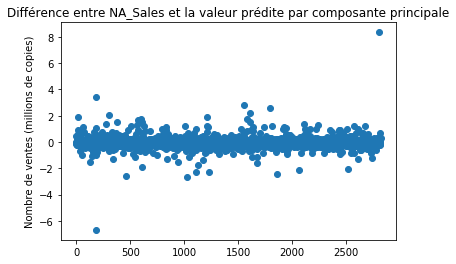

Description des jeux ayant une erreur prédite > 1 million


,JP_Sales,Other_Sales,NA_Sales,Global_Sales
count,35.000000,35.000000,35.000000,35.000000
mean,0.503091,0.263823,3.075519,4.980770
std,1.096003,0.421059,2.605966,5.697346
min,0.000042,0.000449,1.191141,1.291261
25%,0.000625,0.044049,1.664718,1.826943
50%,0.008543,0.140435,2.278639,3.086707
75%,0.135100,0.314693,2.734104,4.644816
max,4.130397,1.898965,12.781561,23.210893


In [40]:
#Pour le modèle composantes princpiales
erreurNA = Yvalidation['NA_Sales'].values - predCP_na
x = list(range(0, len(erreurNA)))

plt.scatter(x, erreurNA)
plt.title('Différence entre NA_Sales et la valeur prédite par composante principale')
plt.ylabel('Nombre de ventes (millions de copies)')
plt.show()

#Recherche des jeux qui ont une erreur > 1 avec la prédiction
index = [index for index, value in enumerate(erreurNA) if value > 1]
jeux = pd.concat([Xvalidation[['JP_Sales', 'Other_Sales']], Yvalidation], axis = 1)
descriptionJeux = jeux.iloc[index,:]

print('Description des jeux ayant une erreur prédite > 1 million')
descriptionJeux.describe()

In [41]:
#Recherche des jeux qui ont une erreur < -1 avec la prédiction
index = [index for index, value in enumerate(erreurNA) if value < -1]
jeux = pd.concat([Xvalidation[['JP_Sales', 'Other_Sales']], Yvalidation], axis = 1)
descriptionJeux = jeux.iloc[index,:]

print('Description des jeux ayant une erreur prédite < -1 million')
descriptionJeux.describe()

Description des jeux ayant une erreur prédite < -1 million


,JP_Sales,Other_Sales,NA_Sales,Global_Sales
count,24.000000,24.000000,24.000000,24.000000
mean,1.218746,0.342780,0.235623,2.091997
std,0.781802,0.667805,0.441417,1.192635
min,0.001377,0.000051,0.000326,0.572556
25%,0.707878,0.001721,0.000953,1.276109
50%,1.270378,0.020224,0.001845,1.886632
75%,1.490563,0.412470,0.197765,2.444172
max,3.180183,2.929564,1.821554,4.622378


On remarque bien dans le premier tableau que les jeux ayant une mauvaise prédiction par notre modèle linéaire de composantes principales (erreur > 1) sont tous des jeux qui ont vendu peu au Japon, mais beaucoup en Amérique du Nord.

À l'inverse, dans le deuxième tableau, nous remarquons l'effet opposé (pour les jeux ayant une erreur < -1).

On voit le même problème pour notre modèle bayesienRidge:

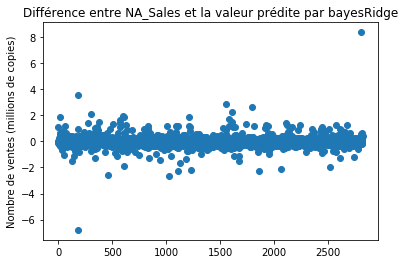

Description des jeux ayant une erreur prédite > 1 million


,JP_Sales,Other_Sales,NA_Sales,Global_Sales
count,44.000000,44.000000,44.000000,44.000000
mean,0.462035,0.307026,3.005835,5.008798
std,1.038405,0.433912,2.368821,5.264052
min,0.000042,0.000449,1.218187,1.291261
25%,0.000885,0.068905,1.833053,2.140271
50%,0.010759,0.163524,2.268709,3.106943
75%,0.128266,0.351693,2.956731,4.898199
max,4.130397,1.898965,12.781561,23.210893


In [42]:
#Pour le modèle bayesienRidge
erreurNA = Yvalidation['NA_Sales'].values - predBaye_na
x = list(range(0, len(erreurNA)))

plt.scatter(x, erreurNA)
plt.title('Différence entre NA_Sales et la valeur prédite par bayesRidge')
plt.ylabel('Nombre de ventes (millions de copies)')
plt.show()

#Recherche des jeux qui ont une erreur > 1 avec la prédiction
index = [index for index, value in enumerate(erreurNA) if value > 1]
jeux = pd.concat([Xvalidation[['JP_Sales', 'Other_Sales']], Yvalidation], axis = 1)
descriptionJeux = jeux.iloc[index,:]

print('Description des jeux ayant une erreur prédite > 1 million')
descriptionJeux.describe()

In [43]:
#Recherche des jeux qui ont une erreur < -1 avec la prédiction
index = [index for index, value in enumerate(erreurNA) if value < -1]
jeux = pd.concat([Xvalidation[['JP_Sales', 'Other_Sales']], Yvalidation], axis = 1)
descriptionJeux = jeux.iloc[index,:]

print('Description des jeux ayant une erreur prédite < -1 million')
descriptionJeux.describe()

Description des jeux ayant une erreur prédite < -1 million


,JP_Sales,Other_Sales,NA_Sales,Global_Sales
count,25.000000,25.000000,25.000000,25.000000
mean,1.201180,0.323423,0.163480,1.963422
std,0.770645,0.657116,0.280712,1.048106
min,0.001377,0.000051,0.000326,0.572556
25%,0.730593,0.001967,0.000962,1.283845
50%,1.259707,0.028803,0.001778,1.622935
75%,1.450840,0.181288,0.140511,2.351405
max,3.180183,2.929564,0.921302,4.402210


#### 4.4.1 Résolution du problème avec modèle logit
---

Pour tanter de règler les problèmes de nos modèles, nous avons tenté de faire un modèle logit qui nous permettait d'ajouter une variable explicative, soit une variable booléenne indiquant si les ventes au Japon sont plus grandes qu'en Amérique du Nord.

Voici le code de ce modèle:

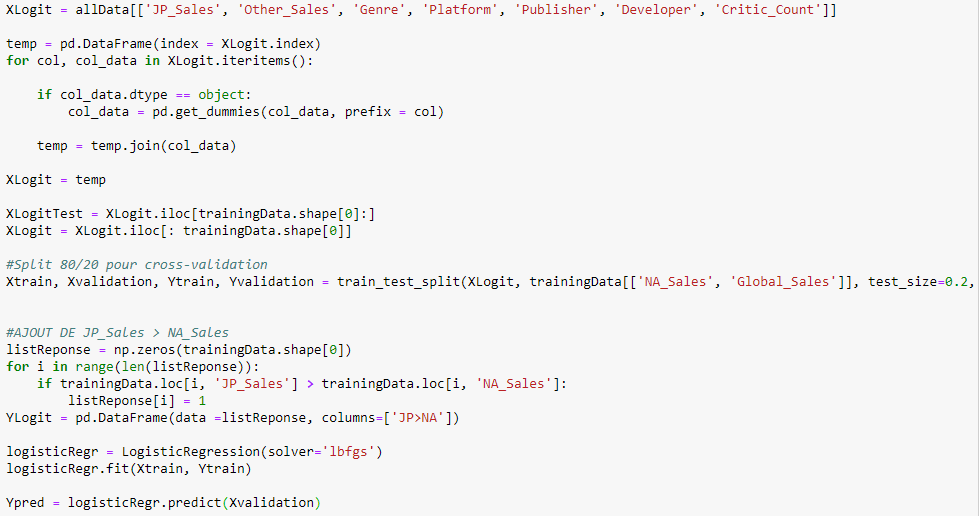

Comme on peut le voir dans le code ci-dessus, nous avons utilisé les variables explicatives __JP_Sales__, __Other_Sales__, __Genre__, __Platform__, __Publisher__, __Developer__ et __Critic_Count__ pour prédire si les ventes au Japon seront plus grandes qu'en Amérique du Nord.

Notre modèle avait un taux de succès d'environ 87%. Par contre, l'ajout de cette variable explicative ne règlait pas notre problème. Ceci peut être expliqué par trois phénomènes.

Premièrement, nous avons utilisé les mêmes données pour entrainer notre modèle logit et nos modèles linéaires (donc nous utilisions des données que nos modèles avaient déjà vu).

Deuxièmement, nos modèles linéaires prédisaient quand même bien une grande partie des jeux qui avaient peu de ventes au Japon mais beaucoup en Amérique du Nord. Ainsi, l'ajout de cette variable venait perturber la précision des ventes de ces jeux.

Finalement, le 13% de taux d'erreur du modèle logit causait des faux positifs ce qui impactait négativement le RMSE.

### 4.5. Modèles d'arbres de décisions
---

Nous avons décidé d'essayer deux modèles d'arbres de décision afin de régler les problèmes que nos modèles linéaires avaient. Voici les deux modèles que nous avons utilisés:
- Random Forest
- Gradient Boosting

Les modèles d’arbres de décision se basent sur les données d’entraînement pour créer plusieurs arbres de décision afin de catégoriser les données. Chaque feuille d’un arbre a une valeur associée qui sera utilisée pour avoir la valeur de prédiction finale. La valeur de la prédiction finale est la somme de toutes les valeurs associées aux feuilles appartenant à la donnée. Par exemple, si on veut classifier à quel point les membres d’une famille aiment les jeux vidéo, on pourrait avoir les arbres suivants :

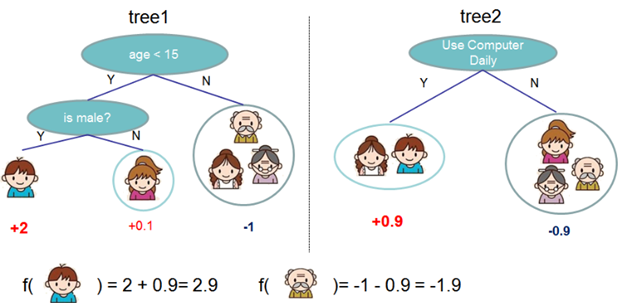

On peut voir que la valeur pour la prédiction du garçon est la somme des feuilles dont il fait partie. Mathématiquement, les prédictions de la variable d’intérêt sont les sommes des valeurs des feuilles des arbres.

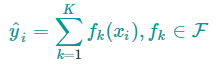

Où K est le nombre d’arbres, f est la fonction de l’espace F, et F est l’ensemble de tous les arbres possibles. Tout arbre de décision cherche à optimiser une fonction objective :

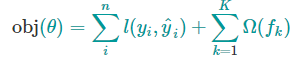

Où l est la fonction de perte et Ω est la fonction de régularisation. La méthode idéale serait alors de construire tous les arbres possibles et prendre celui ayant la fonction objective minimale, mais c’est irréaliste puisqu’une infinité d’arbres est possible. On doit donc recourir à d’autres techniques.
Les modèles d’arbres de décisions sont des modèles d’ensembles. Il existe deux grandes familles de modèle d’ensembles, soit le « bagging » et le « boosting ». Le « bagging » consiste à construire plusieurs modèles indépendants et les combiner en faisant une moyenne. Tandis que le « boosting » ne construit pas les modèles indépendamment, il les construit séquentiellement. C’est-à-dire que tous les modèles subséquents dépendent des précédents. On peut voir dans la figure suivante ces deux techniques.

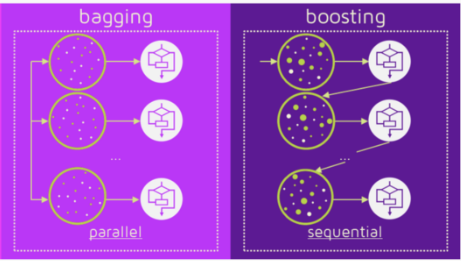
Source:
<br>
https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

Un bon exemple de « bagging » est un arbre de décision utilisant l’algorithme « random forest » et un bon exemple de « boosting » serait un arbre de décision utilisant l’algorithme « gradient boosting ». On peut voir les différentes caractéristiques de ces deux approches dans la figure suivante :

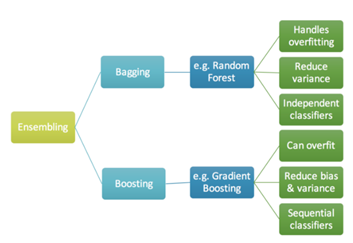

Équations et images tirées de:
<br>
https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d
<br>
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

#### 4.5.1. Random Forest
---

Afin d’améliorer notre prédiction, nous avons aussi utilisé des « Random Forests Regression » de la librairie sklearn de Python. Ces forêts sont composées de plusieurs arbres décisionnels qui sont mélangés aléatoirement afin de rendre la prévision plus précise. L’algorithme crée ces arbres décisionnels lors de l’étude aléatoire de plusieurs observations de notre « training dataset ». Le plus d’arbres qui sont créés dans la forêt, le plus mieux sera notre prévision. L’algorithme de « Random Forest » se déroule comme suit : il crée une forêt à partir du training set comme expliqué plus haut. Il faut donc planter des arbres et les faire grandir le plus possible!  Ensuite, il faut faire une sélection de variables optimale.

Voici les étapes qui sont utilisées pour la création des arbres :
1.	Sélection aléatoire de n variables explications parmi les M variables explicatives totales (où n<M)
2.	Parmi les n variables aléatoires, utiliser le meilleur « Split point » qui permet de diviser le nœud courant en nœuds filles et ainsi, de réduire le nombre le nombre de variables aléatoires M à partir de ce nœud. La librairie Sklearn que nous utilisions opte pour le MSE (mean square error) pour la sélection de la meilleure division (split point). C’est donc cette méthode que nous avons utilisée pour déterminer le meilleur « split point », on aurait pu utiliser d’autres méthodes tel le MAE (mean absolute error).
3.	Il faut répéter les étapes 1 et 2 jusqu’à tant que l’arbre ait une largeur maximale L.
4.	Il faut répéter les étapes 1 à 3 a fois, donc pour chaque arbre a dans notre foret, afin de les faire grandir.

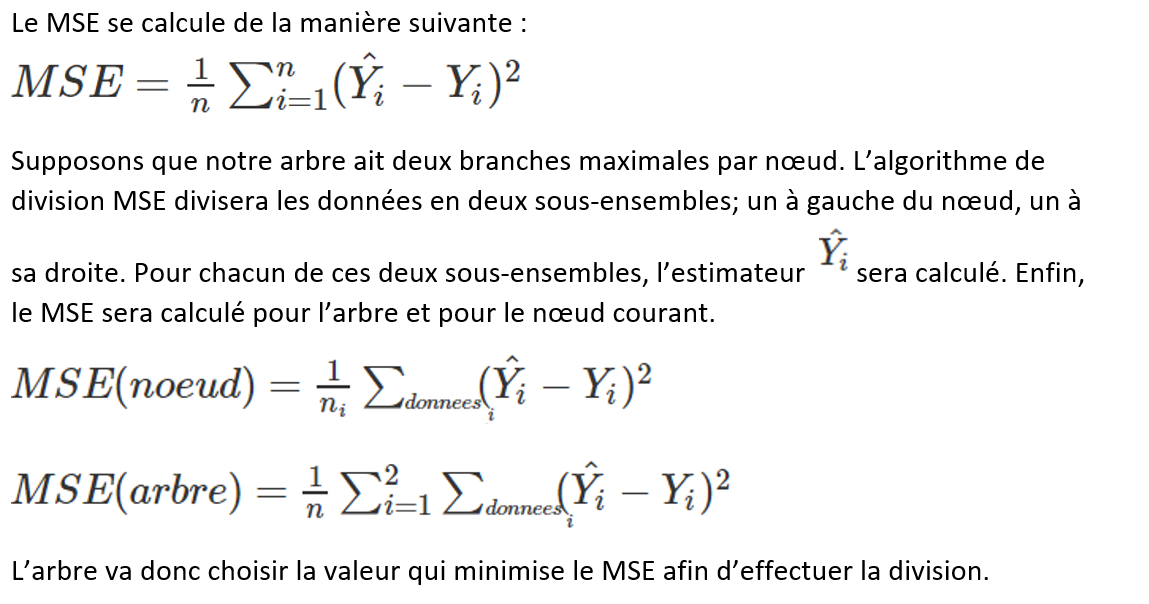

Équations et informations tirées de:
<br>
https://www.quora.com/What-are-the-splitting-criteria-for-a-regression-tree

Figure : La sélection aléatoire des variables aléatoires

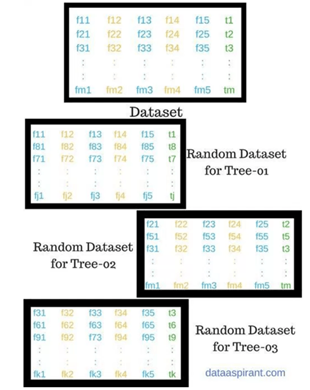

Source : https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674?fbclid=IwAR0_-ZuFeTgxedMLweWWFDQ6FWlzJWo2mdekDuhYCe7Iil-EDvHXs6-iCzU

##### 4.5.1.1. Sélection des variables explicatives
---

Voici les variables explicatives que nous avons utilisées:

- JP_Sales
- Other_Sales
- Genre
- Platform
- Year_of_Release
- Publisher
- Developer

De plus, nous avons ajouté deux variables explicatives:

- Number_of_Game_per_Year
- Weighted_score

Un problème avec les modèles d'arbres décisionnels est qu'ils performent mal lorsqu'une ou plusieurs variables explicatives possèdent une grande cardinalité. De ce fait, nous avons d'abord essayé un "ordinal encoding" pour les variables __Developer__ et __Publisher__ qui possèdent deux grandes cardinalités.

Cette approche convertit chaque valeur d’une variable explicative (string) en un Integer allant de 1 jusqu’au nombre total de catégories uniques dans cette variable. Par exemple, si on a comme valeurs « Ferrari », « Audi » « BMW » dans une variable explicative « Marque », on pourrait faire une colonne de marque où on remplace Ferrari par 1, Audi par 2 et BMW par 3.

Cependant, cette méthode, quoique plus rapide en temps d'exécution, donne des résultats moins précis. Ceci pourait être expliqué par le fait que nos modèles supposent qu’il y a un lien logique entre les valeurs de cette variable.

Ainsi, comme pour les modèles des composantes principales, nous avons utilisé un encodage binaire (aussi appelé One hot encoding) pour les variables explicatives qui n'ont pas de valeurs numériques.

In [44]:
#Selection des variables explicatives
Xall = allData[['JP_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year_of_Release', 'Weighted_Score', 'Publisher','Developer', 'Number_of_Game_per_Year']]

#One-hot encoding pour les variables non numériques
temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp

#Split train/test
X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

X.head()

,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,...,Developer_id Software- Nerve Software,Developer_id Software- Raven Software,Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_oeFun,Developer_puzzle.tv,Developer_syn Sophia,Developer_zSlide,Number_of_Game_per_Year
0,0.050524,0.010024,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,761.0
1,0.039211,0.001791,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1242.0
2,0.000374,0.001797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003.0
3,0.001382,0.140010,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,824.0
4,0.069422,0.009535,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,576.0


##### 4.5.1.2. Modèles en action
---

In [45]:
#Split 80/20 pour cross-validation
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, trainingData[['NA_Sales', 'Global_Sales']], test_size=0.2, random_state=47)

Pour les modèles Random Forest, il y a un hyperparamètre qui sera important d'optimiser. En effet, le nombre d'estimateurs (n_estimators) qui est le nombre d’arbres dans la forêt.

Pour déterminer la valeur optimale de cet hyperparamètre, que nous allons utiliser dans le modèle pour __NA_Sales__ et __Global_Sales__, nous avons calculé l'impact que celui-ci a sur le RMSE (à l'aide de la validation croisée).

Voici le code que nous avons utilisé pour trouver le nombre d'estimateurs optimal:

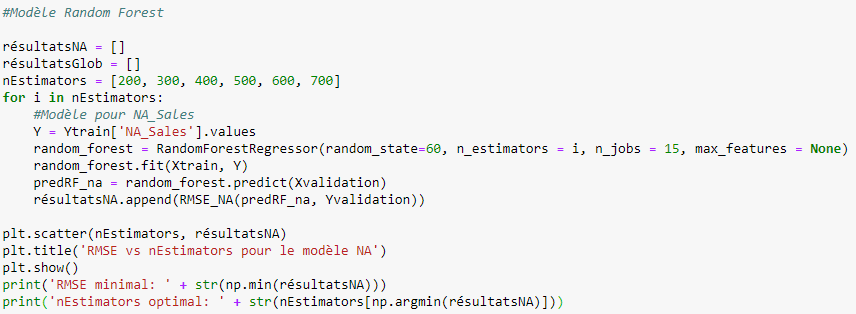


Nous n'avons pas inclus ce code dans le notebook, car il prend beaucoup de temps à exécuter. Pour cette même raison, nous avons décidé de prendre le même nombre d'estimateurs pour le modèle global. Voici, par contre, les graphiques et le nombre d'itérations optimal pour le modèle NA:

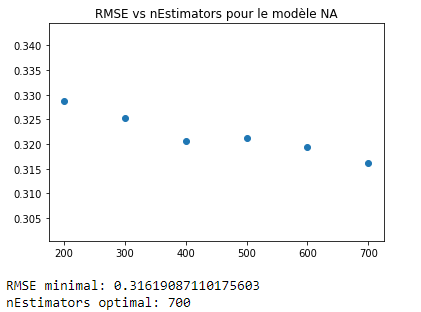

Ainsi, pour nos deux modèles nous allons prendre un nombre d'estimateurs de 700.

In [46]:
#Modèle Random Forest

#Modèle pour NA_Sales
Y = Ytrain['NA_Sales'].values
random_forest = RandomForestRegressor(random_state=60, n_estimators = 700, n_jobs = 15, max_features = None)
random_forest.fit(Xtrain, Y)
predRF_na = random_forest.predict(Xvalidation)


#Modèle pour GLobal_Sales
Y = Ytrain['Global_Sales'].values
random_forest = RandomForestRegressor(random_state=60, n_estimators = 700, n_jobs = 15, max_features = None)
random_forest.fit(Xtrain, Y)
predRF_glob = random_forest.predict(Xvalidation)


#RMSE combiné
RMSE_RF = RMSE(predRF_na, predRF_glob, Yvalidation)
print('RMSE combiné du modèle RF: ' + str(RMSE_RF))

RMSE combiné du modèle RF: 0.4218775624654368


#### 4.5.2. Gradient Boosting
---

Pour cette méthode de machine learning, il s’agit d’utiliser un weak learner comme modèle de départ pour prédire. Par la suite, les erreurs résiduelles sont prises en considération pour pouvoir déterminer un modèle plus efficace et plus complexe qui correspondrait mieux à nos données. La méthode de gradient boosting effectue de nombreuses itérations en utilisant le modèle précédent pour en avoir un nouveau qui essaye d’améliorer le précédent en essayant de corriger les erreurs de prédiction. Alors, à la fin, nous obtiendrons un ensemble de modèles de prédiction, représentant les arbres de décisions. Mathématiquement, on peut représenter la prédiction à chaque itération d’entraînement de façon suivante :

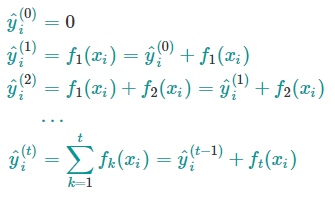


Si on remplace $\hat{y}_i(t)$ dans notre fonction objective, on obtient:
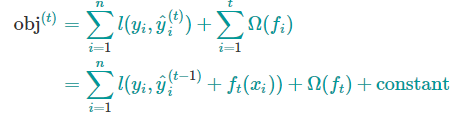

L’objectif du gradient boosting est de déterminer une fonction de perte pour ensuite pouvoir la minimiser. Effectivement, dans la librairie que nous utilisons, la fonction de perte peut être MSE (Mean squared error) ou MAE (Mean absolute error). Dans notre cas, nous avons décidé d’utiliser le MSE, puisque la fonction d’évaluation kaggle est le RMSE. Alors, nous cherchons à réduire la valeur du MSE le plus possible.
Puisque notre fonction de perte est le MSE, notre fonction objective est la suivante :

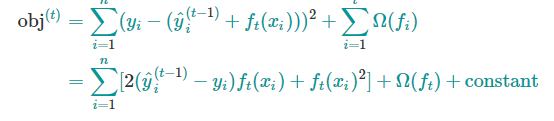

Où :
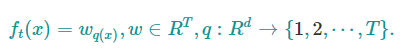

Où w est le vecteur contenant la valeur des feuilles de l’arbre, q est une fonction assignant chaque donnée à une feuille, et T est le nombre de feuilles.

Puisque la forme de la fonction de perte MSE devient très complexe à partir du deuxième ordre. L’expansion de Taylor est utilisée, on obtient alors :
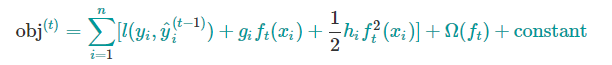

Où 
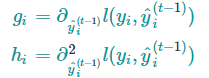

Lorsqu’on retire les constantes, on obtient la forme:
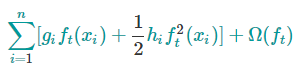

Il nous reste qu’à définir la fonction de régularisation Ω. Avec la librairie XGboost, la fonction de régularisation Ω est la suivante :
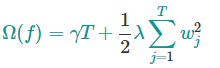

Où γ est la valeur de gain minimal requis pour ajouter une feuille et λ est la constante de régularisation. Ces deux variables sont des hyperparamètres de la fonction de régularisation et plus leur valeur est grande, plus le modèle sera conservateur.
Il y a plusieurs autres types de fonctions de régularisation, mais XGboost stipule que celle-ci est dans la plupart des cas la plus efficace.

Finalement, on obtient la fonction objective suivante :
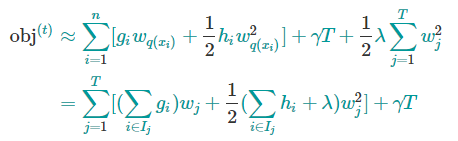

On peut ici remplacer certains termes afin d’alléger la notation de la fonction. On a alors :
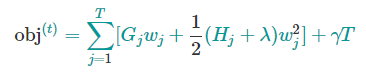

Où
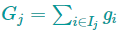

et 
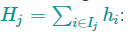

Puisque les wj sont indépendants les uns des autres et que la forme est quadratique. La fonction objective peut être définie par :
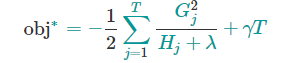

C’est à l’aide de cette fonction objective que l’algorithme décidera d’ajouter des nœuds aux arbres de décisions. En effet, on peut calculer le gain de séparer une feuille en deux feuilles subséquentes. On peut calculer la valeur de la fonction objective pour la feuille de gauche et l’additionner à la valeur pour la feuille de gauche. Lorsqu’on soustrait à cette valeur la valeur précédente de la fonction objective, on obtient le gain engendré par la séparation d’une feuille en deux feuilles subséquentes. Voici l’équation de gain :
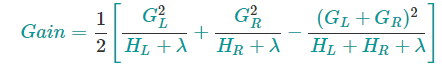

Ainsi, si le gain est négatif, on ne doit pas ajouter de feuilles. Cependant, une valeur positive ne veut pas certainement dire qu’on ajoute une feuille. En effet, l’hyperparamètre γ indique le seuil minimal de gain requis pour ajouter une feuille. La fonction de gain est alors plutôt :
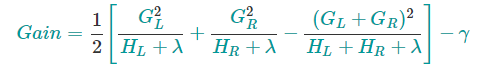

Cette fonction est celle utilisé par l’algorithme de « gradient boosting » pour déterminer si on ajoute des feuilles à un arbre ou non. On ajoute les feuilles si le gain est positif et on n’en ajoute pas sinon.

Équations tirées de:
<br>
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

Voici un image visualisant les premières étapes de cette algorithme:

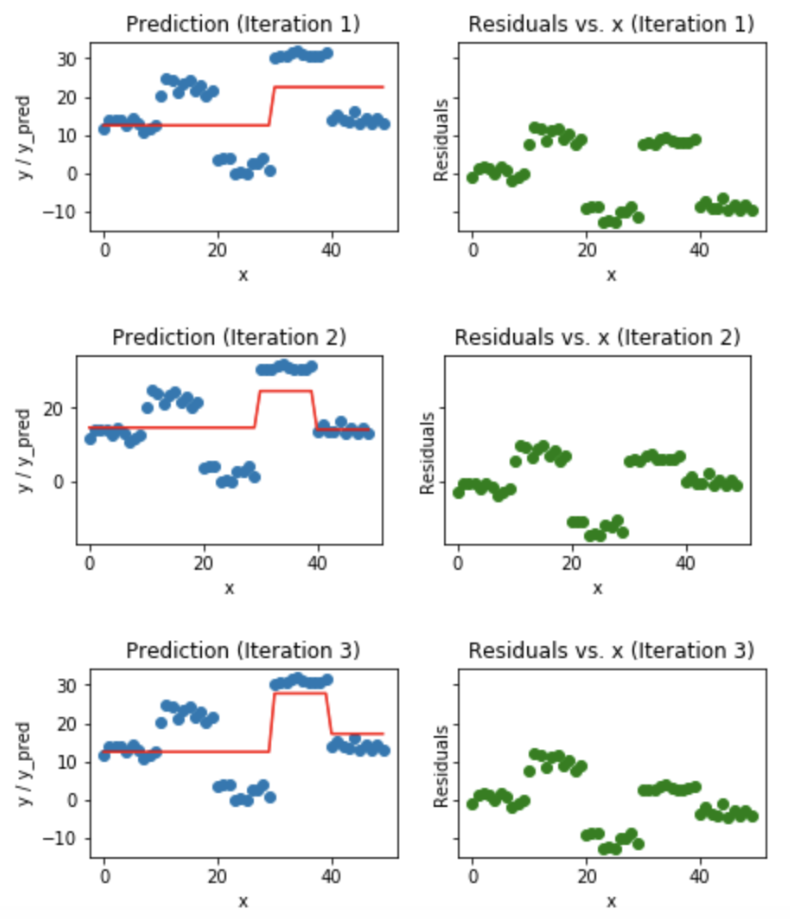

Source:
<br>
https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d



##### 4.5.2.1. Sélection des variables explicatives
---

Voici les variables explicatives que nous avons utilisées:

- JP_Sales
- Other_Sales
- Genre
- Platform
- Year_of_Release
- Publisher
- Developer

De plus, nous avons ajouté deux variables explicatives:

- Number_of_Game_per_Year
- Weighted_score

Encore une fois, un problème avec les modèles d'arbres décisionnels est qu'ils performent mal lorsqu'une ou plusieurs variables explicatives possèdent une grande cardinalité. De ce fait, nous avons d'abord essayer un "ordinal encoding" pour les variables __Developer__ et __Publisher__ qui possèdent deux grandes cardinalités.

Cependant, cette méthode, quoique plus rapide en temps d'exécution, donne des résultats moins précis. Ceci pourait être expliqué par le fait que nos modèles supposent qu’il y a un lien logique entre les valeurs de cette variable.

Ainsi, comme pour les modèles des composantes principales, nous avons utilisé un encodage binaire (aussi appelé One hot encoding) pour les variables explicatives qui n'ont pas de valeurs numériques.

In [47]:
#Selection des variables explicatives
Xall = allData[['JP_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year_of_Release', 'Weighted_Score', 'Publisher','Developer', 'Number_of_Game_per_Year']]

#One-hot encoding pour les variables non numériques
temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp

#Split train/test
X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

X.head()

,JP_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,...,Developer_id Software- Nerve Software,Developer_id Software- Raven Software,Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_oeFun,Developer_puzzle.tv,Developer_syn Sophia,Developer_zSlide,Number_of_Game_per_Year
0,0.050524,0.010024,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,761.0
1,0.039211,0.001791,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1242.0
2,0.000374,0.001797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003.0
3,0.001382,0.140010,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,824.0
4,0.069422,0.009535,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,576.0


##### 4.5.2.2. Modèles en action
---

In [48]:
#Split 80/20 pour cross-validation
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, trainingData[['NA_Sales', 'Global_Sales']], test_size=0.2, random_state=47)

Pour les modèles Gradient Boosting, il y a plusieurs hyperparamètres qui seront importants d'optimiser.

Commençons par l'hyperparamètre alpha, qui est un terme de régularisation sur les poids des arbres décisionnels. Augmenter cette valeur rendra le modèle plus conservateur. C'est bien ce que nous voulons, puisque la variance des données est assez grande.

On ne veut pas un alpha trop petit puisqu'on cherche un modèle minimalement conservateur. Nous avons décider de prendre la même valeur pour le modèle NA et Global.

Voici le code que nous avons utilisé pour trouver le alpha optimal:

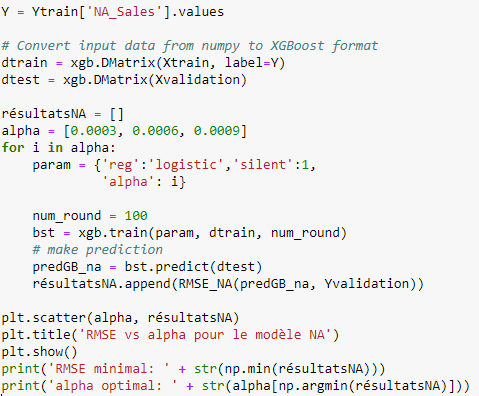

Le deuxième hyperparamètre que nous voulons optimiser est le minChildWeight. Le child weight est la somme des poids des enfants d'un arbre. Lorsque cette valeur est plus petite que le minChildWeight, l'arbre va arrêter de subdiviser ses feuilles.

On a décidé de prendre la même valeur pour le modèle NA et Global.

Voici le code que nous avons utilisé pour trouver le minChildWeight optimal:

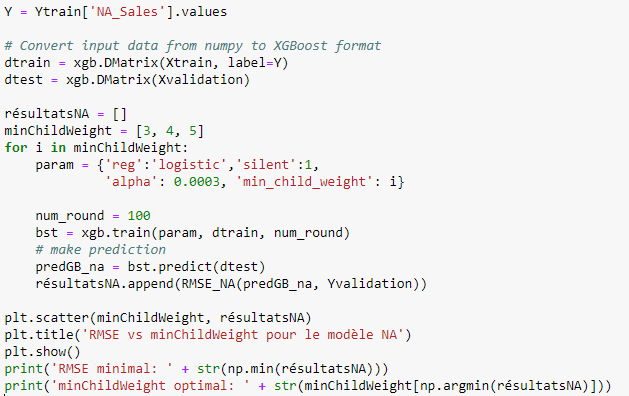

Le dernier hyperparamètre que nous voulions optimiser est l'eta (ou learning rate). Une technique permettant de ralentir l’apprentissage dans le modèle de renforcement de gradient consiste à appliquer un facteur de pondération aux corrections apportées aux nouveaux modèles.

Cette pondération s'appelle le taux d'apprentissage. Définir des valeurs inférieures à 1,0 a pour effet d'apporter des corrections à chaque arbre ajouté au modèle. Il est courant d’avoir de petites valeurs autour de 0,1.

Informations tirées de:
<br>
https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

Dû à l'importance de ce paramètre, nous avons décidé de trouver la valeur optimale pour les deux modèles (NA et Global).

Voici le code que nous avons utilisé pour trouver le eta optimal:

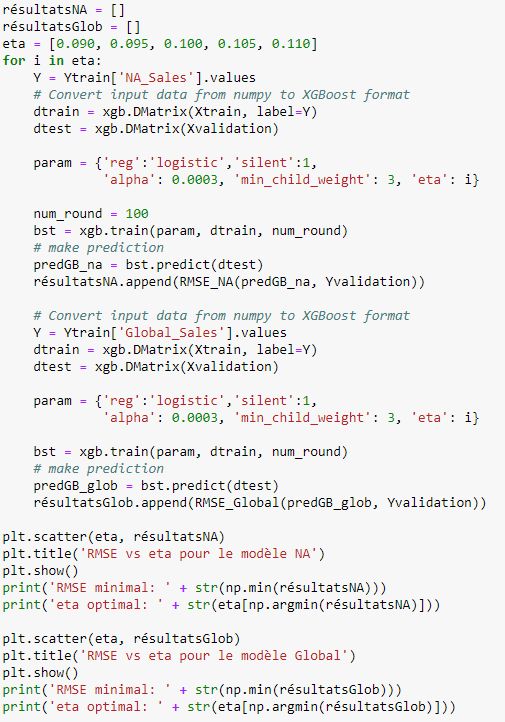

Nous n'avons pas inclus ces codes dans le notebook, car ils prennent beaucoup de temps à exécuter. Voici, par contre, les graphiques et les hyperparamètres optimaux pour le modèle NA et Global (pour le eta):

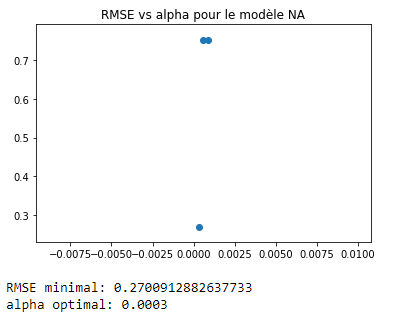

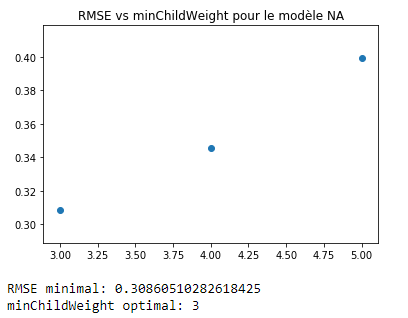

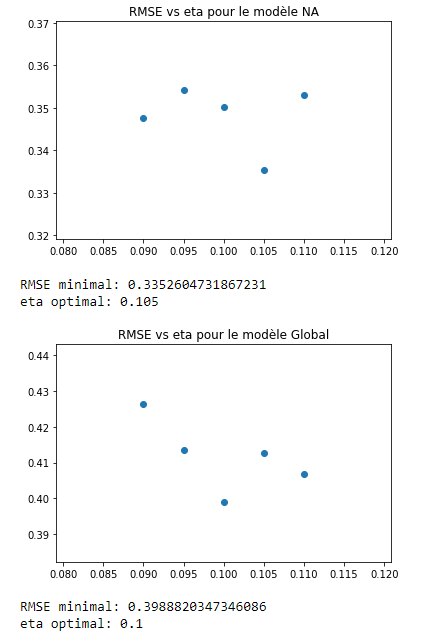

Nous avons ensuite décider d'utiliser un grand num_round (1000) qui est le nombre d'arbres que le modèle va combiner pour créer son modèle final de prédiction.

In [49]:
#Modèle Gradient Boosting
num_round = 1000
param = {'reg':'logistic','silent':1, 
         'alpha': 0.0003, 'min_child_weight': 3, 'eta': 0.105}

# Convert input data from numpy to XGBoost format
Y = Ytrain['NA_Sales'].values
dtrain = xgb.DMatrix(Xtrain, label=Y)
dtest = xgb.DMatrix(Xvalidation)
bst = xgb.train(param, dtrain, num_round)

# make prediction
predGB_na = bst.predict(dtest)


# Convert input data from numpy to XGBoost format
Y = Ytrain['Global_Sales'].values
dtrain = xgb.DMatrix(Xtrain, label=Y)
dtest = xgb.DMatrix(Xvalidation)

param = {'reg':'logistic','silent':1, 
         'alpha': 0.0003, 'min_child_weight': 3, 'eta': 0.1}

bst = xgb.train(param, dtrain, num_round)

# make prediction
predGB_glob = bst.predict(dtest)

#RMSE combiné
RMSE_GB = RMSE(predGB_na, predGB_glob, Yvalidation)
print('RMSE combiné du modèle GB: ' + str(RMSE_GB))

RMSE combiné du modèle GB: 0.3517493618040026


### 4.6. Blending des modèles
---

En apprentissage machine, le terme blending réfère à l'utilisation de différents modèles pour les combiner ensemble et obtenir un modèle plus précis. La stratégie est de construire plusieurs modèles différents et essayer de faire la moyenne de la prédiction de tous ces modèles. La clé ici est l'utilisation de modèles différents pour que les lacunes d'un modèle soient minimisées par les forces des autres modèles et vice-versa.

En effet, voici une image expliquant les étapes nécessaires pour effectuer un "blending" de modèles:

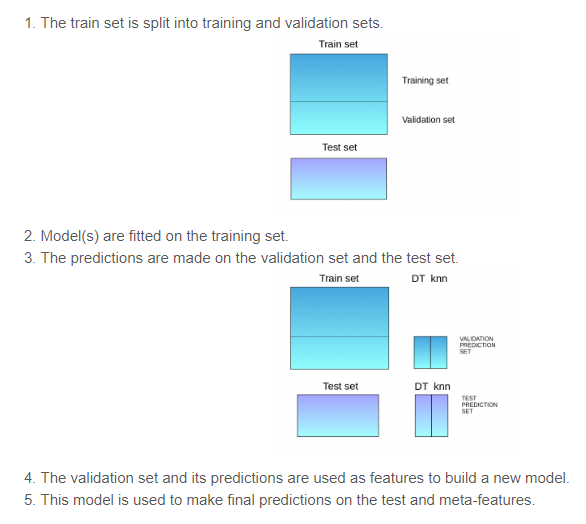
Image tirée de:
<br>
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

Voici ce que Owen Zhang, qui était classé n.1 sur Kaggle en 2015, a à dire sur le sujet:

_"Une chose qui est très utile lors de la fusion est que vous ne recherchez pas le modèle individuel le plus puissant. Vous voulez toujours un modèle qui fonctionne, mais vous voulez un modèle différent. Parfois, je construis intentionnellement un modèle faible. Ils aident beaucoup lorsque vous les ajoutez à un modèle fort. La clé est donc la diversité."_

Citation tirée de:
<br>
https://nycdatascience.com/blog/meetup/featured-talk-1-kaggle-data-scientist-owen-zhang/


Lorsque tous ces modèles sont construits, il est possible de faire une moyenne pondérée des prédictions de ceux-ci. Une technique plus efficace est d'associer des poids à chacun des modèles et déterminer par validation croisée la combinaison de poids qui minimise le RMSE des données de validation.

Dans notre cas, nous cherchons les $\omega_i$ qui minimisent les RMSE pour les prédictions de __NA_Sales__ et de __Global_Sales__:

\begin{align}
MIN(RMSE_{NA}) & = \omega_1 * M_1 + \omega_2 * M_2 + \omega_3 * M_3 + \omega_4 * M_4 \\
MIN(RMSE_{Global}) & = \omega_1 * M_1 + \omega_2 * M_2 + \omega_3 * M_3 + \omega_4 * M_4 \\
\end{align}

Où les $\omega_i$ sont les poids associés à chacun des modèles et les $M_i$ sont les prédictions de ces modèles. 

Voici l'algorithme que nous avons fait pour déterminer les poids optimaux que nous devons donner à chacun de nos huit modèles (quatre pour les prédictions __NA_Sales__ et quatres pour les prédictions __Global_Sales__):

In [50]:
#Algorithme pour déterminer les poids optimaux
wCP = np.arange(0, 1, 0.1)
wBaye = np.arange(0, 1, 0.1)
wGBM = np.arange(0, 1, 0.1)
wRFM = np.arange(0, 1, 0.1)

meilleurCombinaisonNA = [0, 0, 0, 0, 10]
meilleurCombinaisonGlobal = [0, 0, 0, 0, 10]
for w1 in wCP:
    for w2 in wBaye:
        for w3 in wGBM:
            for w4 in wRFM:
                if w1 + w2 + w3 + w4 == 1:
                    reponseNA = predCP_na * w1 + predBaye_na * w2 + predGB_na * w3 + predRF_na * w4
                    reponseGlobal = predCP_glob * w1 + predBaye_glob * w2 + predGB_glob * w3 + predRF_glob * w4
                    reponse_NA = RMSE_NA(reponseNA, Yvalidation)
                    reponse_Global = RMSE_Global(reponseGlobal, Yvalidation)
                    
                    if reponse_NA < meilleurCombinaisonNA[4]:
                        meilleurCombinaisonNA = [w1, w2, w3, w4, reponse_NA]
                        
                    if reponse_Global < meilleurCombinaisonGlobal[4]:
                        meilleurCombinaisonGlobal = [w1, w2, w3, w4, reponse_Global]

RMSE_Blend = (meilleurCombinaisonNA[4] + meilleurCombinaisonGlobal[4]) / 2
print('Poids optimaux pour le modèle NA: ' + str(meilleurCombinaisonNA))
print('Poids optimaux pour le modèle Global: ' + str(meilleurCombinaisonGlobal))
print('RMSE final: ' + str(RMSE_Blend))

Poids optimaux pour le modèle NA: [0.30000000000000004, 0.1, 0.6000000000000001, 0.0, 0.26959177993270084]
Poids optimaux pour le modèle Global: [0.2, 0.0, 0.8, 0.0, 0.36272347253041964]
RMSE final: 0.31615762623156024


On remarque pour les modèles NA et Global, le modèle Random Forest n'est pas utilisé dans le blending. De plus, le Gradient Boosting est le modèle qui a le plus de poids et semble bien se combiner avec les modèles linéaires. 

### 4.7. Remise du modèle
---

Analysons le RMSE de chacun des modèles que nous avons développés:

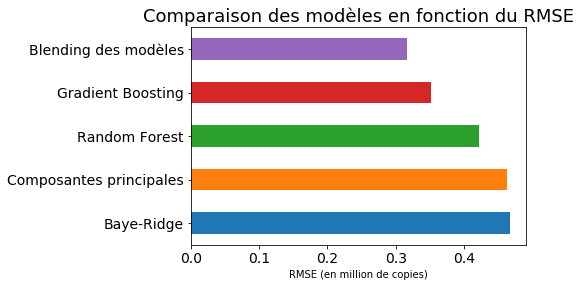

In [51]:
modèles = pd.DataFrame({"Modèles": ["Composantes principales", "Baye-Ridge", "Random Forest", "Gradient Boosting", "Blending des modèles"],
                                 "RMSE": [RMSE_Composante, RMSE_Baye, RMSE_RF, RMSE_GB, RMSE_Blend]})
modèles.sort_values("RMSE", ascending=False).plot(x="Modèles", y="RMSE", kind="barh", legend=False)

plt.xlabel("RMSE (en million de copies)"); plt.yticks(size=14); plt.ylabel(""); plt.xticks(size=14)
plt.title('Comparaison des modèles en fonction du RMSE', size=18);

On remarque bien que le blending des modèles avec les poids optimisés donne le meilleur RMSE.

Nous pouvons maintenant entrainer ce modèle sur toutes les données d'entrainement afin d'avoir un modèle plus robuste (qui a vu plus de données).

Les codes suivants sont donc les mêmes codes que ceux utilisés précédemment, mais avec toutes les données d'entrainement disponibles.

#### 4.7.1. Composantes principales
---

In [52]:
Xall = allData[['JP_Sales', 'Other_Sales', 'User_Count', 'Genre', 'Platform', 'Critic_Score', 'Critic_Count', 'Year_of_Release', 'User_Score', 'Publisher', 'Developer', 'Number_of_Game_per_Year']]

temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp

X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

#composantes principal
matriceCov = X.cov()
lamda, e = np.linalg.eig(matriceCov.values)

lamda = np.real(lamda)
e = np.real(e)

idx = lamda.argsort()[::-1]
lamda = lamda[idx]
e = e[:,idx]

Z = np.dot(X, e[:,0:292])

Y = trainingData['NA_Sales'].values
Y = Y.reshape((-1,1))

#regression lineaire pour modèle NA
regr_na = linear_model.LinearRegression()
regr_na.fit(Z, Y)
regr_na.coef_ = regr_na.coef_.reshape((-1,1))
beta = np.dot(e[:,0:292], regr_na.coef_)
beta = beta.reshape((1,-1))
beta = np.insert(beta, 0, float(regr_na.intercept_))

Yglob = trainingData['Global_Sales'].values
Yglob = Yglob.reshape((-1,1))


Z2 = np.dot(X, e[:,0:231])

regr_glob = linear_model.LinearRegression()
regr_glob.fit(Z2, Yglob)

regr_glob.coef_ = regr_glob.coef_.reshape((-1,1))
beta2 = np.dot(e[:,0:231], regr_glob.coef_)
beta2 = beta2.reshape((1,-1))
beta2 = np.insert(beta2, 0, float(regr_glob.intercept_))

Xtest.insert(loc=0, column='1', value = np.ones(Xtest.shape[0]))
resultatNA = np.dot(beta, Xtest.transpose())
resultatGLOB = np.dot(beta2, Xtest.transpose())

#Prédiction pour Composantes principales
predictionLinéarireNA = np.transpose(resultatNA)
predictionLinéarireGlobal = np.transpose(resultatGLOB)

#### 4.7.2. Régression bayesien-Ridge
---

In [53]:
Xall = allData[['JP_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year_of_Release', 'Weighted_Score', 'Publisher','Developer', 'Number_of_Game_per_Year']]

temp = pd.DataFrame(index = Xall.index)
for col, col_data in Xall.iteritems():
    
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)
        
    temp = temp.join(col_data)
    
Xall = temp

X = Xall.iloc[: trainingData.shape[0]]
Xtest = Xall.iloc[trainingData.shape[0]:]

Y = trainingData['NA_Sales'].values
regNA = BayesianRidge(n_iter =100)
regNA.fit(X, Y)

Y = trainingData['Global_Sales'].values
regGlobal = BayesianRidge(n_iter =100)
regGlobal.fit(X, Y)

#Prédiction pour Bayesien-Ridge
predictionBayesienNA = regNA.predict(Xtest)
predictionBayesienGlobal = regGlobal.predict(Xtest)

#### 4.7.3. Gradient Boosting
---

In [54]:
Y = trainingData['NA_Sales'].values
num_round = 1000

# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X, label=Y)
dtest = xgb.DMatrix(Xtest)

param = {'reg':'logistic','silent':1, 
         'alpha': 0.0003, 'min_child_weight': 3, 'eta': 0.105}

bstNA = xgb.train(param, dtrain, num_round)

# Convert input data from numpy to XGBoost format
Y = trainingData['Global_Sales'].values
dtrain = xgb.DMatrix(X, label=Y)
dtest = xgb.DMatrix(Xtest)

param = {'reg':'logistic','silent':1, 
         'alpha': 0.0003, 'min_child_weight': 3, 'eta': 0.1}

bstGlobal = xgb.train(param, dtrain, num_round)


#Prédiction pour Gradient Boosting
predictionGBNA = bstNA.predict(dtest)
predictionGBGlobal = bstGlobal.predict(dtest)

#### 4.7.4. Blend des modèles
---

In [55]:
#On applique les poids optimaux pour les prédictions
predictionNA = predictionLinéarireNA * 0.3 + predictionBayesienNA * 0.1 + predictionGBNA * 0.6 
predictionGlobal = predictionLinéarireGlobal * 0.2 + predictionGBGlobal * 0.8

# créer le fichier à soumettre
results = pd.DataFrame()
results['ID'] = testData['ID']
results['NA_Sales'] = predictionNA
results['Global_Sales'] = predictionGlobal

#On se débarasse des valeurs de ventes négatives pour les remplacer par la somme de JP_Sales et Other_Sales
results[results < 0] = 0
results.loc[results['Global_Sales'] == 0, 'Global_Sales'] = testData.loc[results.loc[results['Global_Sales'] == 0, 'Global_Sales'].index.values, 'JP_Sales'].values + testData.loc[results.loc[results['Global_Sales'] == 0, 'Global_Sales'].index.values, 'Other_Sales'].values

results.to_csv('submission_sample.csv',sep = ',',index = False)

# 5. Conclusion
---

Pour conclure, nous avons commencé en utilisant les modèles appris dans le cours. En utilisant ces modèles, nous avons pu obtenir un RMSE d'environ 0.51. Nous avons rapidement trouvé les lacunes que nos modèles linéaires avaient pour une bonne proportion des données. Ainsi, pour améliorer notre RMSE, nous avons fait des recherches pour trouver d'autres modèles qui n'étaient pas appris en cours afin de comparer leur efficacité.

Nous avons aussi découvert que la combinaison de plusieurs modèles pouvait donner un meilleur taux de prédiction qu'un seul modèle isolé.

Pour améliorer nos modèles, nous aurions pu essayer plus de combinaisons d'hyperparamètres (surtout pour le Gradient Boosting). En effet, puisque nos modèles prenaient beaucoup de temps à compiler, nous n'avons pas eu le temps d'essayer beaucoup de combinaisons. De plus, il aurait été intéressant de combiner un réseau de neurones avec notre "blend" de modèles. 

Aussi, pour permettre de choisir de meilleur hyperparamètres pour tous nos modèles, il aurait été intéressant d'utiliser une validation croisée non-exhaustive nommé k-fold cross validation. Cette méthode partitionne notre échantillon en k sous-ensembles qui seront utilisés pour tester et valider notre modèle et k-1 sous-ensembles pour entrainer ce dernier. Chacun des k sous-ensembles de validation est testé une seule fois en tant que l’ensemble de validation. Ensuite, ces résultats seront combinés pour aboutir à une seule estimation. 

Pour mieux expliquer ce modèle, voici un exemple concret avec k=4. Notre échantillon sera partitionné en quatre sous-ensembles A, B, C et D avec une taille égale. Soit un N le nombre de données total dans notre échantillon, la taille de chacun des quatre sous-ensembles sera N/4. Nous aurons un cas où A est le sous-ensemble utilisé pour valider et tester nos données et B, C et D pour entrainer notre modèle, un autre cas où ce sera B (testing dataset) et A, C et D pour entrainer, un autre cas où ce sera C (testing dataset) et A, B et D pour entrainer et un dernier cas où se sera D (testing dataset)  et A, B et C pour entrainer. Nous pouvons voir une visualisation de cet exemple dans la figure suivante.

Figure : Exemple de k-fold cross-validation avec k=4

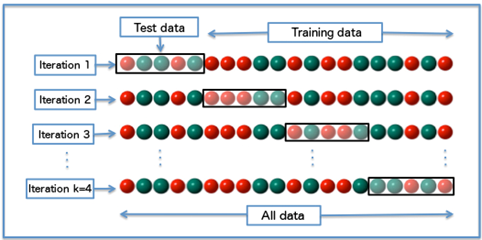
Image et informations tirées de:
<br>
https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.jpg

Cette méthode permet l'utilisation de toutes nos données d'entrainement pour entrainer nos modèles et les valider. Elle aurait été fortement utile puisque comme nous avons vu dans l'analyse des variables, il y a plusieurs __Publisher__ et __Developer__ qui apparaissent seulement une fois dans toutes les données. 

Bref, il y a une multitude de modèles et d'algorithmes que nous aurions voulu essayer, mais le temps nous manquait.